# EDA on CA EnviroScan 4

4/8/22


This is an initial scan over the data included in the California Office of Environmental Health Hazard Assessment [EnviroScan 4.0 report](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-40), released in 2021.

The data is accompanied by a [data dictionary](../enviroscreen_info/CAES4/calenviroscreen40resultsdatadictionary_F_2021.pdf) with explanations for each of the columns. This data dictionary is also a sheet in the Excel data file.

The data file includes a third sheet with demographic information for each region.

Giovanna and Marshall are each looking over the CA EnviroScans 2 and 3. These came as CSV files, without the extra sheets included in the Excel file.

- [Import libraries](#Import-libraries)
- [Import CAES 4 data](#Import-CAES-4-data)
- [Column Details](#Column-Details)
- [A quick regression](#A-quick-regression)
- [Look at unique zips for each CAES set.](#Look-at-unique-zips-for-each-CAES-set.)
- [Save zip-to-tract dictionaries](#Save-zip-to-tract-dictionaries)

# Import libraries

In [89]:
# general
import os
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# cartopy
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
import cartopy.feature as cfeature

# sklearn

In [90]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [91]:
plt.style.use('dark_background')
plt.style.use('tableau-colorblind10')

# Import CAES 4 data

In [92]:
# list raw data files
data_folder = '../raw_data/'
raw_data_files = os.listdir(data_folder)
raw_data_files

['calenviroscreen-3.0-results-june-2018-update.csv',
 'calenviroscreen2-final-report.csv',
 'calenviroscreen40resultsdatadictionary_F_2021.xlsx',
 'calenviroscreendatav11.xls',
 'cbp12',
 'cbp13',
 'cbp14',
 'cbp15',
 'cbp16',
 'cbp17',
 'cbp18',
 'cbp19',
 'LA_Building_Permits.csv',
 'links',
 'naics2017.txt',
 'naics2017_UTF8.txt']

In [93]:
#import the enviroscan 4 excel data
ca4_file_path = data_folder + 'calenviroscreen40resultsdatadictionary_F_2021.xlsx'
dfca4 = pd.read_excel(ca4_file_path)

In [94]:
#The data takes a few seconds to read, but is only a few MB after being interpreted.
# consider saving a csv copy from the dataframe later.

In [95]:
#look at the top.
dfca4.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.183570,100.000000,95-100% (highest scores),...,79.374746,76.0,98.919598,12.8,93.831338,30.3,91.039290,93.155109,9.663213,99.722642
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.653790,99.987393,95-100% (highest scores),...,95.533902,73.2,98.391960,19.8,99.206143,31.2,92.281369,93.165408,9.664281,99.735250
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.393909,99.974786,95-100% (highest scores),...,81.553661,62.6,93.391960,6.4,61.530453,20.3,63.967047,83.751814,8.687785,95.789208
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.327940,99.962179,95-100% (highest scores),...,78.711598,65.7,95.351759,15.7,97.345133,35.4,96.413181,94.641227,9.817371,99.886536
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.745476,99.949571,95-100% (highest scores),...,86.561104,72.7,98.304020,13.7,95.288912,32.7,94.157161,95.398873,9.895964,99.949571


In [96]:
len(dfca4)

8035

In [97]:
dfca4['ZIP'].value_counts()

90044    26
91331    24
94558    23
90201    22
91342    22
         ..
96013     1
92305     1
93546     1
95585     1
61        1
Name: ZIP, Length: 1355, dtype: int64

### Column list

In [98]:
dfca4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   int64  
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   int64  
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                7932 non-null   float64
 8    CES 4.0 Percentile          7932 non-null   float64
 9   CES 4.0 Percentile Range     7932 non-null   object 
 10  Ozone                        8035 non-null   float64
 11  Ozone Pctl                   8035 non-null   float64
 12  PM2.5                        8035 non-null   float64
 13  PM2.5 Pctl        

The data includes 58 columns, mostly as numerical types.
The three that aren't numerical include locations `California County` and `Approximate Location`. The third `object` type is `CES 4.0 Percentile Range`. This gives a range of numbers that can be turned into numericals.

---
---
# Column Details
---

This section is an overview of the data columns in the CAES 4 data. Other notebooks feature data for the other CAES sets. Data types, histograms, missing values are addressed. Questions that arise from this overview are noted.

---
## 0 Census Tract

In [99]:
col = 'Census Tract'
dfca4[col].describe()

count    8.035000e+03
mean     6.054896e+09
std      2.652280e+07
min      6.001400e+09
25%      6.037265e+09
50%      6.059053e+09
75%      6.073016e+09
max      6.115041e+09
Name: Census Tract, dtype: float64

Text(0.5, 1.0, 'Census Tract histogram')

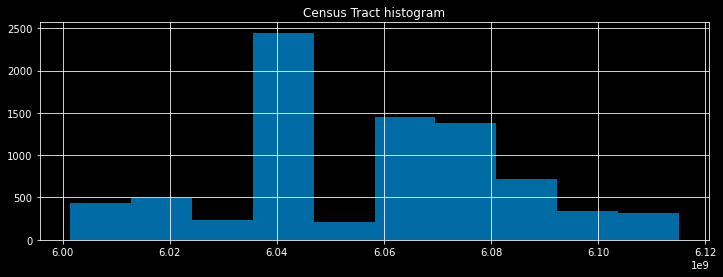

In [100]:
dfca4[col].hist( figsize = (12,4))
plt.title(col + ' histogram')

In [101]:
len(dfca4)

8035

In [102]:
len(dfca4[col].unique())

8035

The number of unique values is the same as the number of observations. Each has its own unique census identifier --- these may be used as indices for the data, but I will wait to see if there's any pattern.

### Q:
    - Do these census regions cover every portion of California?
    - How are they chosen? Are they approximately population organized?
    - Are these regions the same set as those in the other CAES data sets? Were there any changes to them from year to year?

---
##  1   Total Population 

Thanks to [the docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) for help with series.hist(). The `log` parameter is passed to `matplotlib.pyplot.hist()`.

In [103]:
col = 'Total Population'
dfca4[col].describe()

count     8035.000000
mean      4889.047542
std       2269.284396
min          0.000000
25%       3470.000000
50%       4615.000000
75%       5931.000000
max      38754.000000
Name: Total Population, dtype: float64

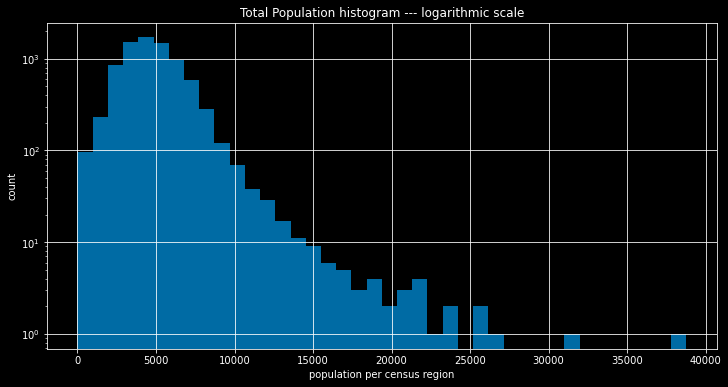

In [104]:
#distribution
dfca4[col].hist(bins=40, log = True, figsize = (12,6));
plt.title(col + ' histogram --- logarithmic scale');
plt.xlabel("population per census region");
plt.ylabel('count');

The population is skewed to higher values, with thousands of small populated areas and only a handful of very heavily populated ones.

None of these populations are "big city" levels, though. The very largest and sprawling areas must be broken into neighborhoods.

### Q:
    - What are the populations measuring? The census number may be a specifically designated region.

## 2 - California County

In [105]:
col = 'California County'
dfca4[col].describe()

count            8035
unique             58
top       Los Angeles
freq             2343
Name: California County, dtype: object

It looks like over a quarter of these regions come from Los Angeles county. It's a big one. There are 58 unique counties.

### Q:
    - is every portion of california's land represented here?
    - is every county represented?
    

## 3   ZIP 

In [106]:
col = 'ZIP'
dfca4[col].describe()

count     8035.000000
mean     92836.574611
std       3445.177594
min         32.000000
25%      91602.000000
50%      92691.000000
75%      94558.000000
max      96161.000000
Name: ZIP, dtype: float64

In [107]:
len(dfca4[col].unique())

1355

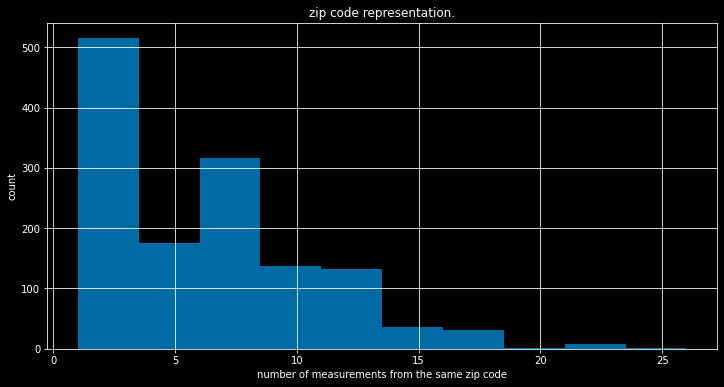

In [108]:
dfca4[col].value_counts().hist(figsize = (12,6))
plt.xlabel("number of measurements from the same zip code")
plt.ylabel("count")
plt.title("zip code representation.");

These are zip codes. There are definitely multiple measurements per zip code --- only 1355 unique values. There is one for each region, but at least one is surely wrong... there is a 32. Is this is something like 00032?

In [109]:
dfca4.loc[dfca4[col] < 10000]

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
4544,6083001800,1050,Santa Barbara,32,Unincorporated Santa Barbara County area,-119.717740,34.777648,22.281902,42.713061,40-45%,...,86.899445,38.5,66.871859,9.3,83.224883,10.6,16.311787,39.005295,4.046117,33.862834
5057,6093001200,1261,Siskiyou,35,Unincorporated Siskiyou County area,-121.826057,41.411603,19.513579,36.245587,35-40%,...,NaN,36.0,63.241206,13.7,95.288912,10.9,17.934094,62.053356,6.436950,68.772063
5143,6033000100,3376,Lake,48,Unincorporated Lake County area,-122.909601,39.335491,18.998409,35.161372,35-40%,...,13.303559,38.5,66.871859,13.1,94.521083,16.7,47.617237,48.453698,5.026223,48.020676
5833,6105000400,894,Trinity,39,Unincorporated Trinity County area,-123.210947,40.069602,15.397582,26.462431,25-30%,...,12.275003,60.3,91.846734,NaN,NaN,37.5,97.629911,55.341376,5.740699,58.295512
6343,6109004200,3487,Tuolumne,40,Unincorporated Tuolumne County area,-119.640723,37.949499,12.828329,20.032779,20-25%,...,0.000000,29.0,52.261307,4.6,39.211348,9.7,12.788340,40.278108,4.178149,35.816944
6579,6017030603,3668,El Dorado,51,Unincorporated El Dorado County area,-120.422095,38.882147,11.697855,17.057489,15-20%,...,0.000000,26.9,48.442211,5.3,48.256117,17.9,53.624842,33.353853,3.459879,24.873928
8025,6083980100,10,Santa Barbara,57,Unincorporated Santa Barbara County area,-120.048221,33.948186,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8034,6111980000,118,Ventura,61,Unincorporated Ventura County area,-119.503588,33.255655,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 8 entries with goofball zips.

These are all "unincorporated" areas. It looks like these are common:

[LACounty.gov Unincorporated Areas](https://lacounty.gov/government/about-la-county/unincorporated-areas/)

[PolicyLink California Unincorporated: Mapping Disadvantaged Communities in the San Joaquin Valley(PDF report)](https://www.policylink.org/sites/default/files/CA%20UNINCORPORATED_FINAL.pdf)

[ZocaloPublicSquare](https://www.zocalopublicsquare.org/2020/11/10/california-unincorporated-communities-covid19-pandemic/ideas/connecting-california/)

## Q:
    - are these unincorporated "zips" real values that are used by the state? Do they mean anything?
    - How many times are certain zip codes represented?
    - Are there other "unincorporated areas"?
    

## 4    Approximate Location     

In [110]:
col = 'Approximate Location'
dfca4[col].describe()

count            8035
unique            785
top       Los Angeles
freq              996
Name: Approximate Location, dtype: object

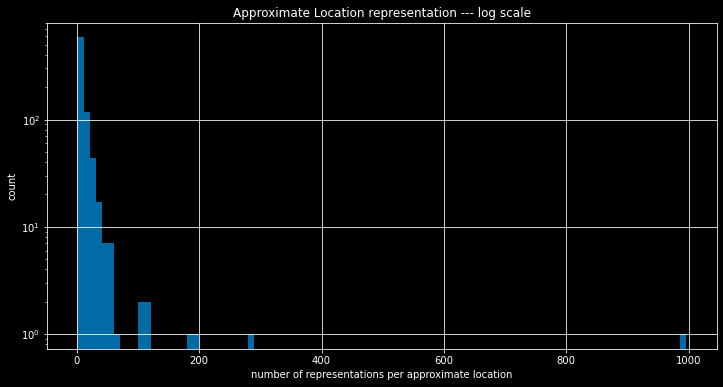

In [111]:
dfca4[col].value_counts().hist(bins = 100, log = True, figsize = (12,6))
plt.xlabel("number of representations per approximate location")
plt.title("Approximate Location representation --- log scale");
plt.ylabel('count');

A lot from LA again. That's the lone 900+. No NaNs. This is basically a "city" stand-in, which accounts for all the places that aren't really cities. The data dictionary stresses that this is for "reference purposes only." What is a reference purpose?

## Q:
    - 

## 5 Latitude and 6 Longitude
There shouldn't be too many surprises here. Check for nans and goofball values. Perhaps an opportunity to practice with [matplotlib](https://matplotlib.org/basemap/users/examples.html).

The data dictionary gives each of these as a latitude and longitude of the _centroid_ of the tract. For disconnected and concave shapes, it is possible for this centroid to lie outside of the border.

In [112]:
dfca4['Latitude'].describe()

count    8035.000000
mean       35.495893
std         2.086016
min        32.547376
25%        33.924145
50%        34.206624
75%        37.634021
max        41.946648
Name: Latitude, dtype: float64

In [113]:
dfca4['Longitude'].describe()

count    8035.000000
mean     -119.409318
std         1.976336
min      -124.297889
25%      -121.518410
50%      -118.429194
75%      -117.924814
max      -114.306484
Name: Longitude, dtype: float64

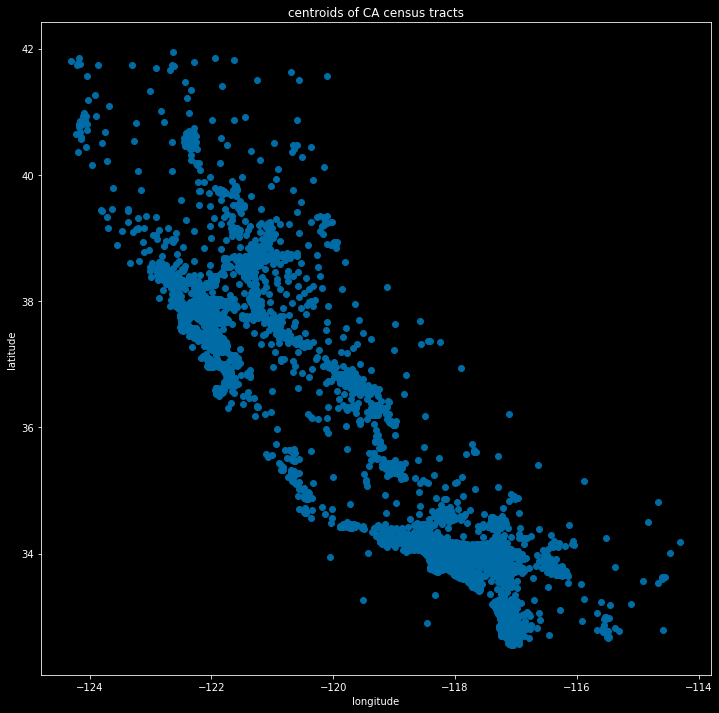

In [114]:
lat = dfca4['Latitude']
lon = dfca4['Longitude']
#plot these bad boys
plt.figure(figsize = (12,12))
plt.scatter(lon, lat)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('centroids of CA census tracts');

Hey! That's California. It even looks like an elevation / population map, with measurements largely avoiding mountainous areas. I'm sure this is primarily a reflection of the distribution of 2010 census areas.

## plotting census tracts

Shapefiles for the California census tracts, defined in 2010, were obtained from [catalog.data.gov](https://catalog.data.gov/dataset/tiger-line-shapefile-2019-state-california-current-census-tract-state-based). The site has this to say about the tracts and their codes:
> Census tracts are small, relatively permanent statistical subdivisions of a county or equivalent entity, and were defined by local participants as part of the 2010 Census Participant Statistical Areas Program. The Census Bureau delineated the census tracts in situations where no local participant existed or where all the potential participants declined to participate. The primary purpose of census tracts is to provide a stable set of geographic units for the presentation of census data and comparison back to previous decennial censuses. Census tracts generally have a population size between 1,200 and 8,000 people, with an optimum size of 4,000 people. When first delineated, census tracts were designed to be homogeneous with respect to population characteristics, economic status, and living conditions. The spatial size of census tracts varies widely depending on the density of settlement. Physical changes in street patterns caused by highway construction, new development, and so forth, may require boundary revisions. In addition, census tracts occasionally are split due to population growth, or combined as a result of substantial population decline. Census tract boundaries generally follow visible and identifiable features. They may follow legal boundaries such as minor civil division (MCD) or incorporated place boundaries in some States and situations to allow for census tract-to-governmental unit relationships where the governmental boundaries tend to remain unchanged between censuses. State and county boundaries always are census tract boundaries in the standard census geographic hierarchy. In a few rare instances, a census tract may consist of noncontiguous areas. These noncontiguous areas may occur where the census tracts are coextensive with all or parts of legal entities that are themselves noncontiguous. For the 2010 Census, the census tract code range of 9400 through 9499 was enforced for census tracts that include a majority American Indian population according to Census 2000 data and/or their area was primarily covered by federally recognized American Indian reservations and/or off-reservation trust lands; the code range 9800 through 9899 was enforced for those census tracts that contained little or no population and represented a relatively large special land use area such as a National Park, military installation, or a business/industrial park; and the code range 9900 through 9998 was enforced for those census tracts that contained only water area, no land area.



Some highlights:
- tract demographics:
    - chosen for population size of 1,200 -- 8,000 people
    - designed to be homogeneous wrt population characteristics, economic status, and living conditions
- rare tracts are noncontiguous
- some code ranges are reserved for certain kinds of region.

| code range | reserved for |
|---|---|
| 9400 -- 9499 | federally recognized American Indian reservations, off-reservation trust lands, or tracts with majority American Indian population |
| 9800 -- 9899 | tracts that contained little or no population and represented a relatively large special land use area such as a National Park, military installation, or a business/industrial park |
| 9900 -- 9998 | 9900 through 9998 was enforced for those census tracts that contained only water area, no land area |

In [115]:
#get census border feature
census_borders_filepath = '../border_shapefiles/tl_2019_06_tract.shp'
census_borders = cfeature.ShapelyFeature(Reader(census_borders_filepath).geometries(), ccrs.PlateCarree(), edgecolor = 'white')


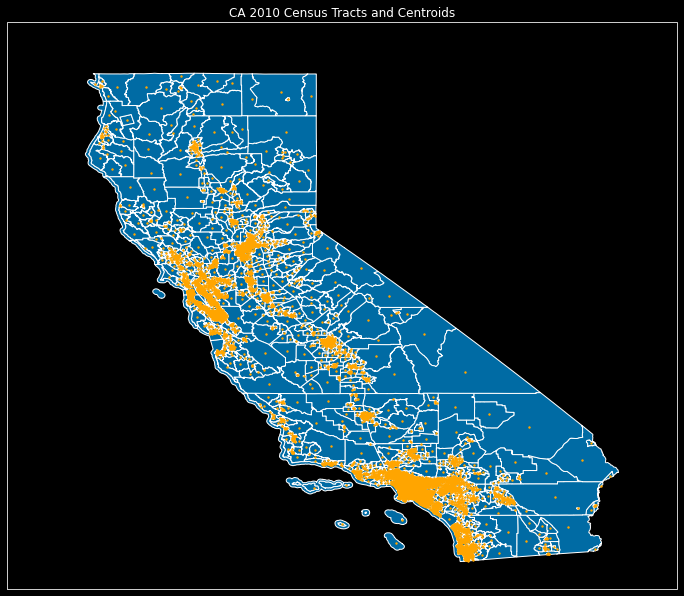

In [116]:
#give lats/lons enclosing beautiful california
west_edge = -126 #left
east_edge = -113 #right

north_edge = 43 #top
south_edge = 32 #bottom

#plot the census tracts
plt.figure(figsize = (12,12))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.add_feature(census_borders, zorder = 0);

#plot the tract centroids
plt.scatter(lon,lat, zorder=1, c = 'orange', s = 2, marker='o')

#add labels
plt.title("CA 2010 Census Tracts and Centroids")

#set boundaries and show
plt.xlim(west_edge,east_edge)
plt.ylim(south_edge, north_edge)
plt.show();

In [117]:
#make a function to plot census tracts and centroids within a certain region.

def plot_tracts(lat_lims = [32,43], lon_lims = [-126,-113], plot_centroids = True, plot_title = 'CA 2010 Census Tracts'): 
    west_lim,  east_lim  = lon_lims
    south_lim, north_lim = lat_lims
    #plot the census tracts
    plt.figure(figsize = (12,12))
    ax = plt.axes(projection = ccrs.PlateCarree())
    ax.add_feature(census_borders, zorder = 0);

    #plot the tract centroids
    plt.scatter(lon,lat, zorder=1, c = 'orange', s = 2, marker='o')

    #add labels
    plt.title(plot_title)

    #set boundaries and show
    plt.xlim(west_lim, east_lim)
    plt.ylim(south_lim, north_lim)
    plt.show();

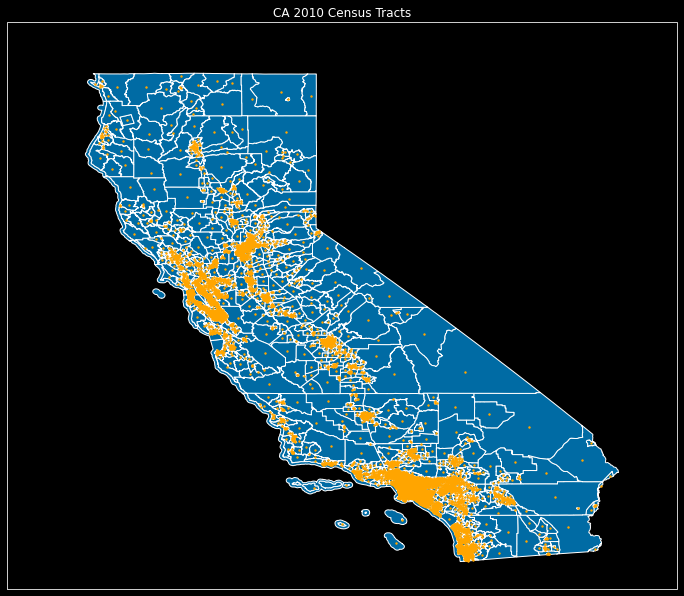

In [118]:
plot_tracts()

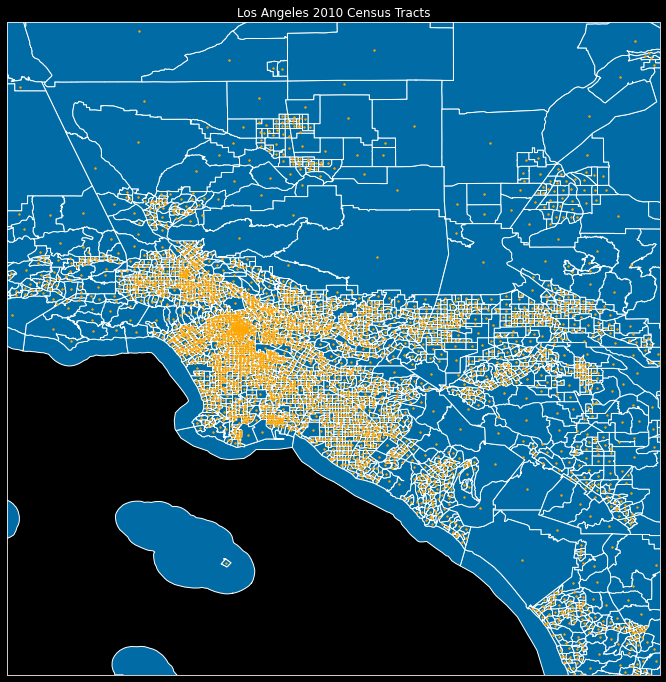

In [119]:
plot_tracts(
    lat_lims = [33,35],
    lon_lims = [-119, -117],
    plot_title = 'Los Angeles 2010 Census Tracts'
           )

Comparing the borders:
It looks like the shape file includes boundaries around census areas extending into the ocean. 

Comparing this to shapes seen in [Google Maps](https://www.google.com/maps/@33.7376071,-118.2114839,166819m/data=!3m1!1e3?hl=en):

![satellite-CA-Google](pix/sacagoogle.png)

These regions extend into the sea, but can also include mountainous and unpopulated areas on the coast. Look at the region on Catalina island outside of the tiny tract for the town of Avalon.

## 7 CES 4.0 Score 

Data dictionary says 
> CalEnviroScreen Score, Pollution Score multiplied by Population Characteristics Score

This is some kind of CES specific score.

In [30]:
col = "CES 4.0 Score"
dfca4[col].describe()

count    7932.000000
mean       28.324179
std        16.512069
min         1.033954
25%        14.786524
50%        25.553719
75%        40.057396
max        93.183570
Name: CES 4.0 Score, dtype: float64

Text(0, 0.5, 'CES 4.0 Score')

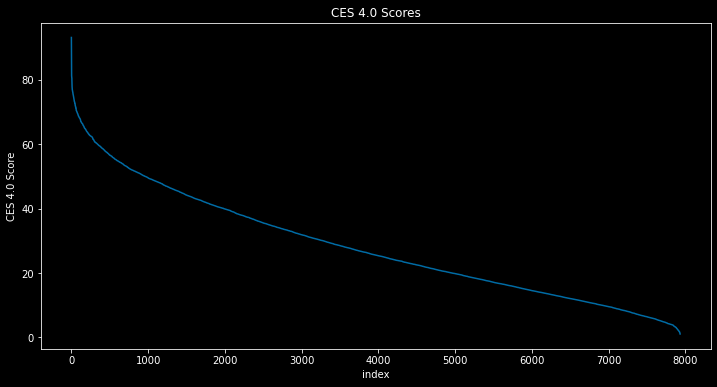

In [31]:
dfca4[col].plot(figsize = (12,6))
plt.title("CES 4.0 Scores")
plt.xlabel("index")
plt.ylabel("CES 4.0 Score")

Text(0, 0.5, 'count')

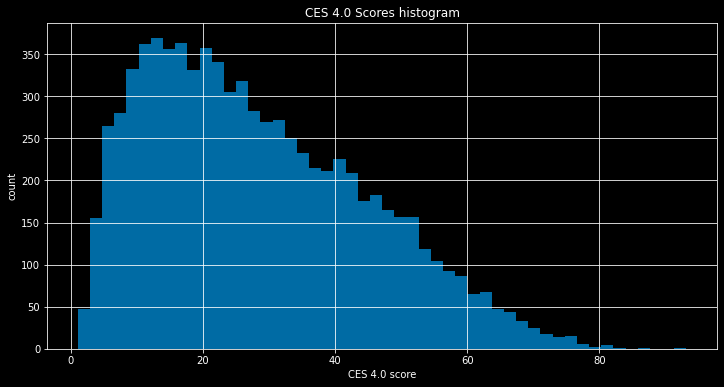

In [32]:
dfca4[col].hist(bins = 50, figsize = (12,6))
plt.title("CES 4.0 Scores histogram")
plt.xlabel("CES 4.0 score")
plt.ylabel("count")

A few NaNs here. It looks like the data set comes sorted by this score. It's also highlighted in the data dictionary. This was really important for this report. Repeating: it's the product of `Pollution Score` and `Population Characteristics Score`, both of which are observed ahead, and are themselves functions of some other measurements.

In [33]:
nan_cols = [] #keep track of columns with NaN values for later.
nan_cols.append('CES 4.0 Score')


## 8 CES 4.0 Percentile

In [34]:
# the percentile column has an extra space. Take it out.
dfca4.rename(columns={' CES 4.0 Percentile':'CES 4.0 Percentile'}, inplace = True)


In [35]:
col = 'CES 4.0 Percentile'
dfca4[col].describe()

count    7932.000000
mean       50.006304
std        28.869333
min         0.012607
25%        25.009455
50%        50.006304
75%        75.003152
max       100.000000
Name: CES 4.0 Percentile, dtype: float64

Text(0, 0.5, 'count')

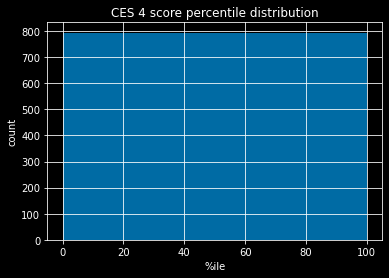

In [36]:
#percentile values: they ought to be evenly spaced, and are!
dfca4[col].hist()
plt.title("CES 4 score percentile distribution")
plt.xlabel("%ile")
plt.ylabel("count")

Same number of nans here, too. Check if they are all for the same observations.

In [37]:
#for each observation, is the isna value for the score the same for the percentile isna?
isna_list = dfca4['CES 4.0 Score'].isna() == dfca4['CES 4.0 Percentile'].isna()
isna_list

0       True
1       True
2       True
3       True
4       True
        ... 
8030    True
8031    True
8032    True
8033    True
8034    True
Length: 8035, dtype: bool

In [38]:
#if they're all true, it'll add up to the size of the list above, 8035.
isna_list.sum()

8035

Yes, all the NaNs for the percentile ranges are the same as those for the score. Let's make sure this is true for the percentile string.

In [39]:
#append to cols with nans
nan_cols.append(col)


## 9 CES 4.0 Percentile Range

In [40]:
col = 'CES 4.0 Percentile Range'
dfca4[col].describe()

count                         7932
unique                          20
top       95-100% (highest scores)
freq                           397
Name: CES 4.0 Percentile Range, dtype: object

It looks like this is just a 5%-binned version of `CES 4.0 Percentile Range`. Just check those NaNs anyway.

In [41]:
#for each observation, is the isna value for the percentile range the same for the percentile isna?
isna_list = dfca4['CES 4.0 Percentile Range'].isna() == dfca4['CES 4.0 Percentile'].isna()
len(isna_list) == isna_list.sum()

True

Yes, they're all paired up appropriately. I don't think this percentile range will be that useful -- it's a lower resolution version of `CES 4.0 Percentile`.

In [42]:
#add to nan list
nan_cols.append(col)

# 10 Ozone

Here's a key one --- Ozone is short-lived, produced by combustion, and a strong oxidizer. It's a lung / mucous membrane irritant. It will be strange if it isn't linked to some extra pulmonary disease.

These values are **DAILY MAXIMA** over 8 hours. Which 8 hours? Are these taken 8 hours at a time over the entire state? This is a really strange integration range. It's also a strange final number. It would be really nice to have had minima, etc. A station seeing one car drive by all day could potentially have the same value here as one with a consistently high value.

Alternatively, it says they are means over summer months (may through october). This seems very strange --- I would think the 8 hour maxes will be more variable and generally higher than the summer month means. It's strange they're added together. I wonder if this contributes to the 2-peakedness.

The units aren't given explicitly. Ozone near the surface is typically measured in ppbv, so it's likely these numbers are ppmv, parts per million by volume.

In [43]:
#no nans
col = 'Ozone'
dfca4[col].describe()

count    8035.000000
mean        0.048666
std         0.010475
min         0.026554
25%         0.041926
50%         0.047165
75%         0.056800
max         0.073132
Name: Ozone, dtype: float64

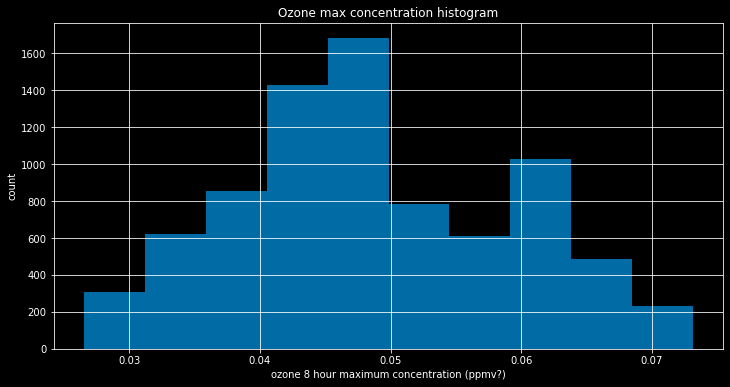

In [44]:
plt.figure(figsize = (12,6))
dfca4[col].hist()
plt.xlabel("ozone 8 hour maximum concentration (ppmv?)")
plt.ylabel("count")
plt.title("Ozone max concentration histogram");

In [45]:
# keep track of pollutants
pollutants = []
pollutants.append(col)

# 11 Ozone Pctl
Ozone percentile.

In [46]:
col = 'Ozone Pctl'
dfca4[col].describe()

count    8035.000000
mean       50.901364
std        28.778394
min         0.186683
25%        26.695706
50%        50.541381
75%        75.121344
max       100.000000
Name: Ozone Pctl, dtype: float64

Text(0, 0.5, 'count')

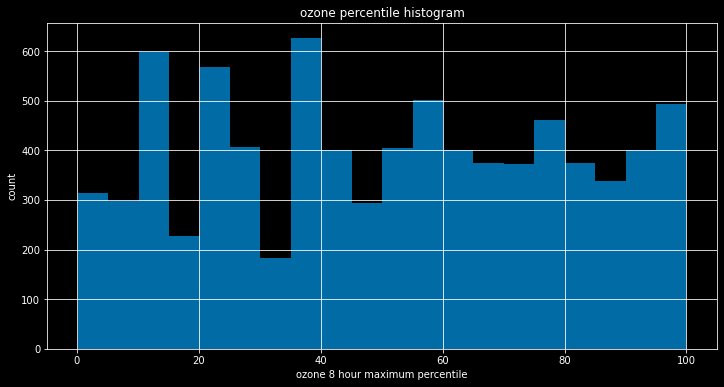

In [47]:
#should be pretty flat, as a percentile
plt.figure(figsize=(12,6))
dfca4[col].hist(bins = 20)
plt.title('ozone percentile histogram')
plt.xlabel('ozone 8 hour maximum percentile')
plt.ylabel('count')

Not exactly even. There are some big jumps in the values even when lined up. This is actually pretty strange.
It could be explained if there are a lot of entries with the same value.

In [48]:
len(dfca4[col].unique())

227

There sure are. This shouldn't be that surprising.

Let's do a Milliken oil-drop experiment on this; find all the differences between successive ozone measurements. If there are only 227 unique values in the set, we're bound to see a value that is only 1 of the smallest distinguishable unit apart from another.

First, let's make sure we've kept track of this column.

In [49]:
#append ozone percentile to pollutants pctiles.
ppcts = []
ppcts.append(col)

### Ozone measurement resolution --- Milliken oil drop

In [50]:
#line up ozone measurements.
ozone_sorted = dfca4['Ozone'].sort_values()
ozone_sorted

3870    0.026554
3663    0.026554
6206    0.026554
3357    0.026554
5062    0.026554
          ...   
6203    0.073132
4535    0.073132
1112    0.073132
4545    0.073132
3487    0.073132
Name: Ozone, Length: 8035, dtype: float64

There's something special about those values. My guess is these were measured in some other unit, then converted by some common multiple.

Used the [numpy docs](https://numpy.org/doc/stable/reference/generated/numpy.delete.html) to figure out `ndarray.delete` for dropping zeros.

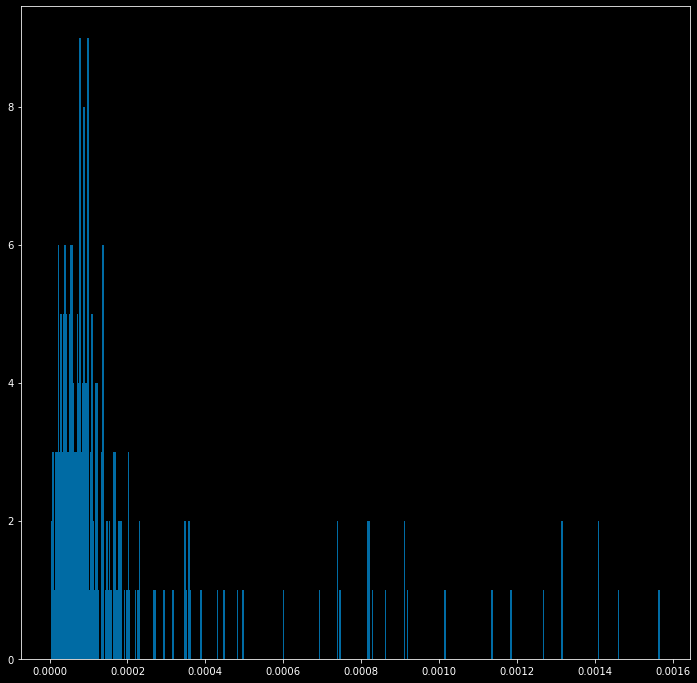

In [51]:
#get successive differences
ozone_diffs = np.diff(ozone_sorted)
ozone_diffs.sort()

#drop all nonzero values
mask = list(map(lambda entry: True if entry != 0 else False, ozone_diffs))
ozone_diffs = ozone_diffs[mask]

#plot histogram.
plt.figure(figsize = (12,12))
plt.hist(ozone_diffs, bins = 2*len(ozone_diffs));

In [52]:
# minimum value is
min_diff = ozone_diffs.min()
min_diff

3.8400000000049506e-06

In [53]:
#are all other values an even multiple of this?
ozone_diffs/min_diff

array([  1.        ,   1.015625  ,   1.90104167,   2.60677083,
         2.60677083,   3.04427083,   3.72916667,   3.86197917,
         4.47135417,   5.01302083,   5.1796875 ,   5.1796875 ,
         5.56510417,   5.56510417,   5.84895833,   5.97916667,
         5.97916667,   6.3046875 ,   6.43229167,   6.43229167,
         6.90625   ,   7.48177083,   7.67447917,   7.67447917,
         7.95572917,   7.95572917,   8.52864583,   8.52864583,
         8.69270833,   9.2734375 ,   9.2734375 ,   9.4765625 ,
         9.4765625 ,   9.52083333,  10.13020833,  10.13020833,
        10.26302083,  10.53125   ,  10.53125   ,  10.86458333,
        10.9375    ,  10.9375    ,  11.28645833,  11.70052083,
        11.70052083,  12.15364583,  12.2578125 ,  12.2578125 ,
        13.00520833,  13.00520833,  13.38541667,  13.50260417,
        13.50260417,  13.66666667,  14.06770833,  14.06770833,
        14.36979167,  14.44791667,  14.44791667,  14.59635417,
        15.00520833,  15.00520833,  15.20052083,  15.20

Okay. This may not be so important. The values are not all even multiples of the minimum difference. But, the min difference is very close to 3.84. I wonder if there's any weirdness with rounding errors here.

# 12  PM2.5 

Annual mean particles < 2.5 micron size concentration. I'm going to guess that there is a passive collector that is put out for the year, then concentration is derived from this.

Checking the [report](../enviroscreen_info/CAES4/calenviroscreen40reportf2021.pdf): the unit is in micrograms per cubic meter. It was also integrated over 2015 to 2017!! This ought to be the same as for CES 3. I wonder if this is included in 2.0.

It also says these are gathered by two sources: anneal mean concentration from monitor concentrations and satellite observations. Could this contribute to the 2-peakedness? Or is there a mechanism that makes locations have PM concentrations of only certain values? This seems unlikely.

In [54]:
col = 'PM2.5'
dfca4[col].describe()

count    8035.000000
mean       10.152700
std         2.165937
min         1.875092
25%         8.575343
50%        10.119433
75%        11.937845
max        16.394748
Name: PM2.5, dtype: float64

In [55]:
#not a gas, but treat the same way.
pollutants.append(col)

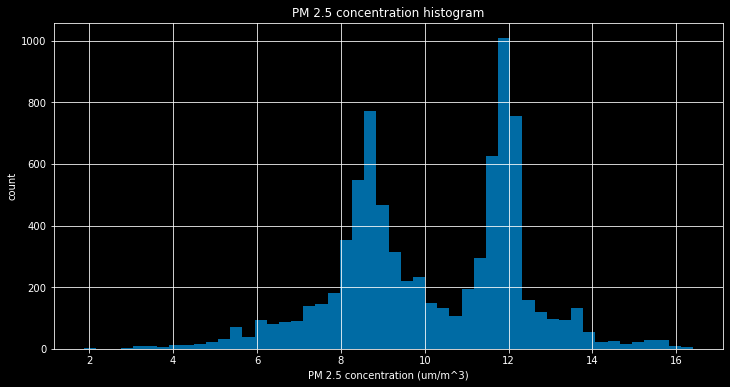

In [56]:
dfca4[col].hist(bins = 50, figsize = (12,6));
plt.xlabel('PM 2.5 concentration (um/m^3)')
plt.ylabel("count")
plt.title("PM 2.5 concentration histogram");

Strange dual peakedness. I wonder if there's a classifier problem here! What's different about left peak places vs right peak places?

In [57]:
pollutants.append(col)

# 13 PM 2.5 Pctl
PM 2.5 percentile.

In [58]:
col = 'PM2.5 Pctl'
dfca4[col].describe()

count    8035.000000
mean       50.007725
std        28.869832
min         0.012446
25%        25.009334
50%        50.006223
75%        75.003111
max       100.000000
Name: PM2.5 Pctl, dtype: float64

<AxesSubplot:>

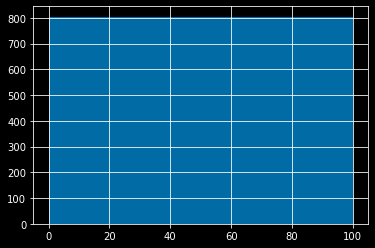

In [59]:
#plot histogram --- should be flat.
dfca4[col].hist()

In [60]:
#append to pollutant percentile list.
ppcts.append(col)

# Diesel PM

These are yearly emissions estimates, in tons/year, NOT a concentration in the air. This is from **2016**, from California Air Resources Board (CARB) model with a 1x1 km grid.
> The data source does not
account for meteorological dispersion of emissions at the
neighborhood scale, which can have local-scale and year-to-year
variability, or significant local-scale spatial gradients known to exist
within a few hundred meters of a high-volume roadway or other
large source of diesel PM.

Most of the high emissions areas are near cities:
![diesel-cali](pix/cali_diesel.png)
![diesel-city-detail](pix/city_diesel.png)
But what's going on in the Mojave desert?
![diesel-mojave](pix/mojave-diesel.png)
![mojave-closeup](pix/mojave_closeup.png)
[google maps](https://www.google.com/maps/@35.4896042,-116.980166,8.71z)

It's Fort Irwin. There are likely plenty of comparable emission sources, but this is the one whose census tract is large. These are total emissions, not normalized for area.

In [61]:
col = 'Diesel PM'
dfca4[col].describe()

count    8035.000000
mean        0.225442
std         0.304643
min         0.000052
25%         0.067683
50%         0.144929
75%         0.286794
max        14.611221
Name: Diesel PM, dtype: float64

Text(0.5, 1.0, 'Diesel PM emissions, tons / yr')

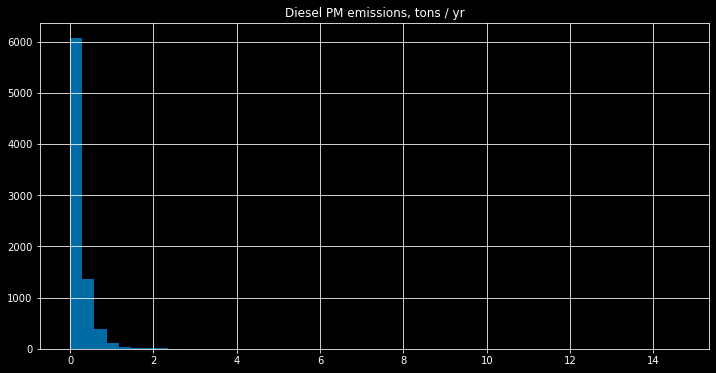

In [62]:
dfca4[col].hist(bins = 50,figsize = (12,6))
plt.title("Diesel PM emissions, tons / yr")

In [63]:
#list the highest Diesel PM emissions
dfca4.sort_values(by = col, ascending = False).head(20)

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
4268,6071025000,9872,San Bernardino,92310,Unincorporated San Bernardino County area,-116.644250,35.402696,23.790542,46.192637,45-50%,...,22.168088,41.7,71.708543,15.8,97.423217,8.5,8.504436,41.772690,4.333186,37.745840
4639,6075010100,3889,San Francisco,94133,San Francisco,-122.408579,37.808420,21.692297,41.515381,40-45%,...,92.718906,48.4,80.113065,4.2,33.576262,14.7,36.653992,40.787373,4.230976,36.396873
2910,6073005400,7888,San Diego,92101,San Diego,-117.166655,32.711941,32.505438,63.313162,60-65%,...,23.765056,17.4,28.165829,9.3,83.224883,15.0,38.783270,49.294376,5.113429,49.117499
7021,6075010200,4167,San Francisco,94109,San Francisco,-122.422925,37.805861,9.423213,11.485124,10-15%,...,20.584653,6.8,4.020101,0.0,0.000000,15.0,38.783270,17.738837,1.840094,5.799294
4701,6075060700,13222,San Francisco,94158,San Francisco,-122.390671,37.772381,21.358729,40.733737,40-45%,...,65.624577,16.1,24.723618,1.8,4.893285,13.6,31.166033,31.399010,3.257098,21.974281
7420,6073011000,3567,San Diego,92118,Coronado,-117.170224,32.693885,6.834440,6.454866,5-10%,...,17.255380,10.1,10.439698,3.9,29.411765,11.7,21.571610,12.484167,1.295014,2.143217
1472,6075023300,3739,San Francisco,94124,San Francisco,-122.397769,37.725414,44.536643,81.442259,80-85%,...,89.930978,33.4,59.233668,8.9,81.012493,24.3,78.111534,71.509918,7.417903,82.135653
6185,6075010400,4536,San Francisco,94133,San Francisco,-122.407558,37.802273,13.630141,22.024710,20-25%,...,27.256733,13.2,17.713568,5.7,53.891202,12.8,27.224335,25.391070,2.633879,13.792234
6856,6075015100,2624,San Francisco,94109,San Francisco,-122.423401,37.787446,10.232191,13.565305,10-15%,...,42.116660,11.6,13.731156,1.8,4.893285,17.4,51.356147,21.074837,2.186146,9.026727
4177,6075012202,3181,San Francisco,94109,San Francisco,-122.419644,37.785414,24.258749,47.339889,45-50%,...,70.523752,54.6,86.683417,9.3,83.224883,29.3,89.378961,51.973979,5.391391,53.353505


In [64]:
dfca4[col].sort_values(ascending = False)

4268    14.611221
4639     4.751602
2910     3.016751
7021     2.760067
4701     2.645858
          ...    
5969     0.000215
5833     0.000214
4313     0.000214
6272     0.000129
7969     0.000052
Name: Diesel PM, Length: 8035, dtype: float64

There are high emission sources, and then some HUGE emission sources.

In [65]:
#what's this huge one?
dfca4.loc[4268]

Census Tract                                                  6071025000
Total Population                                                    9872
California County                                         San Bernardino
ZIP                                                                92310
Approximate Location           Unincorporated San Bernardino County area
Longitude                                                     -116.64425
Latitude                                                       35.402696
CES 4.0 Score                                                  23.790542
CES 4.0 Percentile                                             46.192637
CES 4.0 Percentile Range                                          45-50%
Ozone                                                           0.059485
Ozone Pctl                                                     80.087119
PM2.5                                                           6.465046
PM2.5 Pctl                                         

This is Fort Irwin again. I'm going to assume this is a real value. There's route 15 and a huge military training center. Tanks and helicopters and trucks and cigarettes are all over the place.

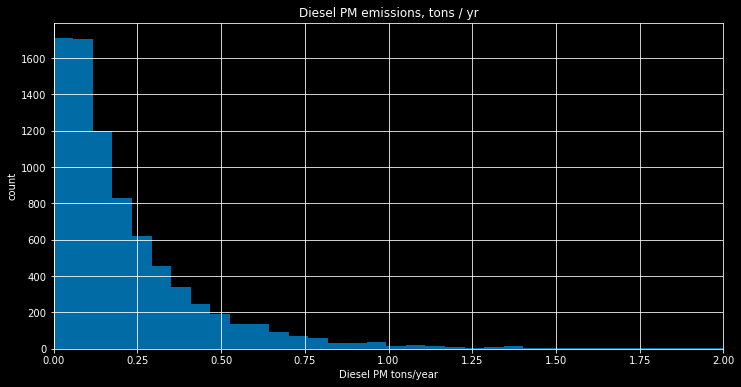

In [66]:
#look at distribution again with the top 3 removed.
dfca4[col].hist(bins = 250,figsize = (12,6))
plt.title("Diesel PM emissions, tons / yr")
plt.xlabel("Diesel PM tons/year")
plt.ylabel("count")
plt.xlim(0,2);

In [67]:
#this is a pollutant in the area, if not a concentration.
pollutants.append(col)

#  15  Diesel PM Pctl

Text(0.5, 1.0, 'Diesel PM emissions percentiles')

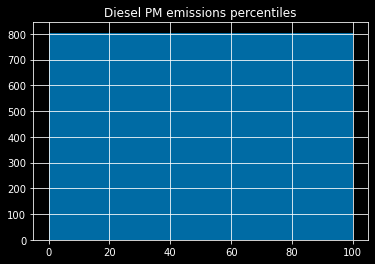

In [68]:
col = 'Diesel PM Pctl'
dfca4[col].hist()
plt.title('Diesel PM emissions percentiles')

Pretty flat. Could be useful in comparing placement with another location, but my guess is these percentiles will be less important than their counterparts measuring a physical value.

# 16  Drinking Water

From the _Water Boundary Tool – Tracking California_ and 8 Groundwater Ambient Monitoring and Assessment (GAMA) projects
> Drinking water contaminant index for selected contaminants (2011
to 2019)

Contaminants include:
- nitrate
- perchlorate
- arsenic
- trihalomethanes (THMs)
- lead
- others:
    - trichloropropane
    - cadmium
    - dibromochloropropane
    - gross alpha
    - chromium, hexavalent
    - ethylene dibromide
    - total haloacetic acids
    - tetrachloroethylene
    - trichloroethylene

In [69]:
col = 'Drinking Water'
dfca4[col].describe()

count    8007.000000
mean      476.915736
std       218.102804
min        32.568922
25%       303.950443
50%       430.429223
75%       678.367027
max      1257.754234
Name: Drinking Water, dtype: float64

Text(0, 0.5, 'count')

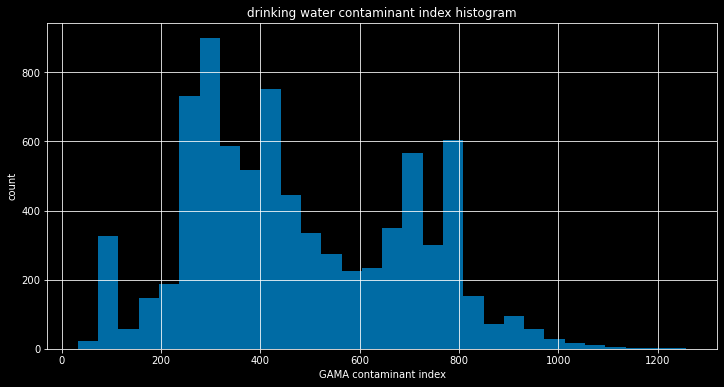

In [70]:
dfca4[col].hist(bins = 30,figsize = (12,6))
plt.title("drinking water contaminant index histogram")
plt.xlabel("GAMA contaminant index")
plt.ylabel('count')

In [71]:
#append to pollutants
pollutants.append(col)

#append to columns with nans
nan_cols.append(col)

# 17 Drinking Water Pctl

In [72]:
col = 'Drinking Water Pctl'
dfca4[col].describe()

count    8007.000000
mean       50.410665
std        28.900564
min         0.099913
25%        25.009367
50%        50.168602
75%        75.134258
max       100.000000
Name: Drinking Water Pctl, dtype: float64

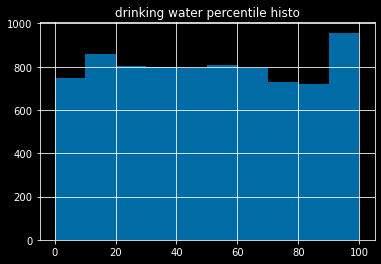

In [73]:
dfca4[col].hist()
plt.title("drinking water percentile histo");

# 18 Lead

>Potential risk for lead exposure in children living in low-income
communities with older housing.
Percentage of households within a census tract with likelihood of
lead-based paint (LBP) hazards from the age of housing (2017
California parcel data and 5-year estimates 2015-2019) combined
with the percentage of households that are both low-income
(household income less than 80% of the county median family
income) and have children under 6 years old (5-year estimates
2013-2017).

```python
lead = [0.6, 0.4] . [ "homes with LBP Hazards Liklihood pctile" , "low-income housholds with children pctile"]
```

In [74]:
col = 'Lead'
dfca4[col].describe()

count    7939.000000
mean       48.971739
std        23.080964
min         0.000000
25%        30.849017
50%        48.908050
75%        66.709935
max        99.352332
Name: Lead, dtype: float64

Text(0.5, 1.0, 'household lead risk percentage per tract')

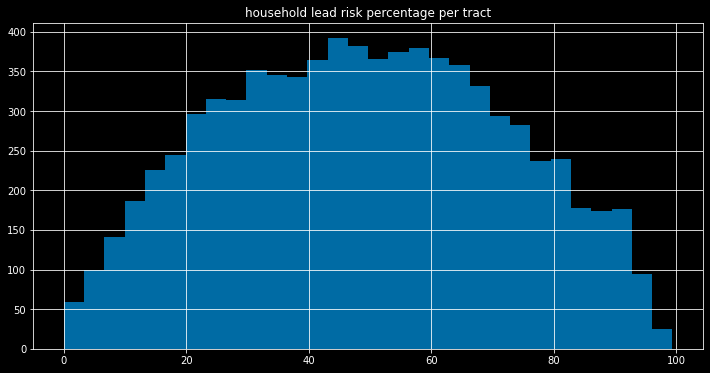

In [75]:
dfca4[col].hist(bins = 30,figsize = (12,6))
plt.title("household lead risk percentage per tract")

In [76]:
#append to pollutants
pollutants.append(col)

#append to cols with nans
nan_cols.append(col)

# 19 Lead Pctl

<AxesSubplot:>

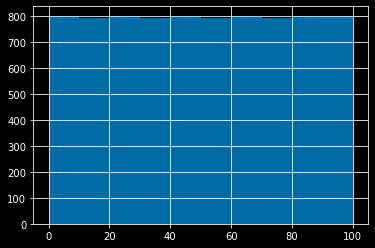

In [77]:
col = 'Lead Pctl'
dfca4['Lead Pctl'].hist()

# 20 Pesticides

pounds per square mile average from 2017 to 2019.

> Total pounds of 132 selected active pesticide ingredients (filtered
for hazard and volatility) used in production-agriculture per square
mile, averaged over three years (2017 to 2019).

>pesticides that did not make the hazard and volatility
criteria, but that are listed as Toxic Air Contaminants (TACs) or
restricted active ingredients based on DPR’s, TAC or restricted use
lists were also included in the analysis.

### Q:
    - is this averaged over time? pounds per square mile per year, or per three years?
    - pounds seems like a lousy measure when volatility, solubility, biological availability, biological impact are all different for each of the 132 pesticides. Are they comparable by weight?
    - Are the heavy users typos or real?

In [78]:
col = "Pesticides"
dfca4[col].describe()

count     8035.000000
mean       268.489439
std       2324.537869
min          0.000000
25%          0.000000
50%          0.000000
75%          0.187485
max      80811.089450
Name: Pesticides, dtype: float64

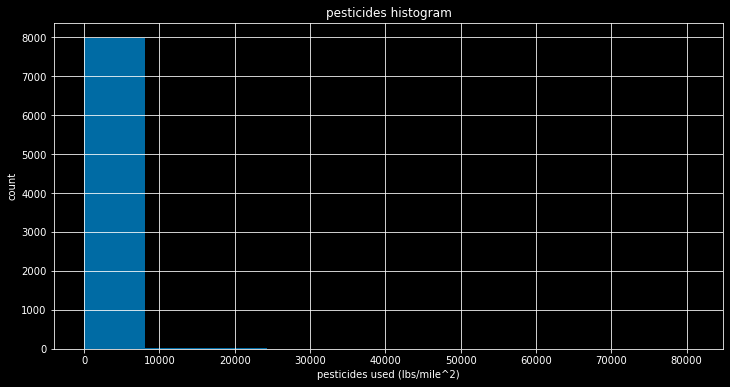

In [79]:
dfca4[col].hist(figsize = (12,6))
plt.title("pesticides histogram")
plt.xlabel("pesticides used (lbs/mile^2)");
plt.ylabel('count');

There's a few big outliers.

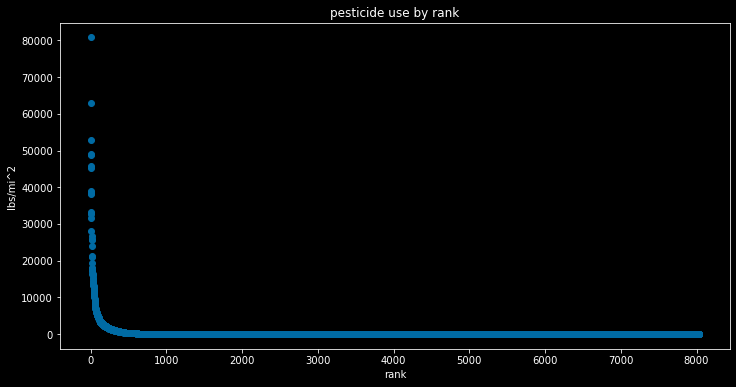

In [80]:
plt.figure(figsize = (12,6))
plt.scatter(np.linspace(0,8035, 8035), dfca4[col].sort_values(ascending = False))
plt.title("pesticide use by rank")
plt.xlabel('rank')
plt.ylabel("lbs/mi^2");

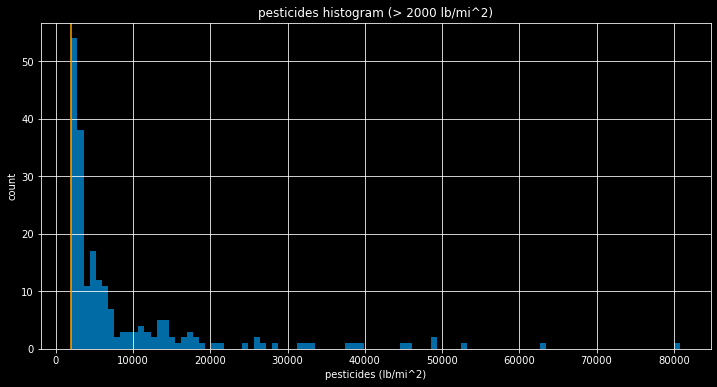

In [81]:
#look at the same plots with zeros removed
dfca4.loc[dfca4[col]>2000,col].hist(bins = 100, figsize = (12,6))
# plt.xlim(0,5000)
plt.title("pesticides histogram (> 2000 lb/mi^2)")
plt.axvline(2000, c='orange')
plt.ylabel("count")
plt.xlabel("pesticides (lb/mi^2)");

In [82]:
#what are these heavy use regions?
dfca4[['Census Tract', 'Total Population', 'California County', 'Approximate Location', 'Latitude', 'Longitude', 'Pesticides']].sort_values(by = col, ascending = False).head(20)

,Census Tract,Total Population,California County,Approximate Location,Latitude,Longitude,Pesticides
2156,6111004716,5066,Ventura,Unincorporated Ventura County area,34.185963,-119.151143,80811.08945
1901,6111004704,1372,Ventura,Unincorporated Ventura County area,34.171270,-119.118691,62980.85215
1536,6053010101,5024,Monterey,Unincorporated Monterey County area,36.863303,-121.781632,52736.94460
4958,6053010505,6016,Monterey,Salinas,36.729155,-121.649421,48918.94790
1691,6111005003,7261,Ventura,El Rio,34.240782,-119.158383,48646.61707
3057,6053010506,5247,Monterey,Salinas,36.724337,-121.654348,45731.47663
2053,6111005002,3339,Ventura,Unincorporated Ventura County area,34.232979,-119.137174,45270.45958
654,6111004902,5072,Ventura,Oxnard,34.208435,-119.134264,39067.26136
3415,6083002306,9003,Santa Barbara,Unincorporated Santa Barbara County area,34.976953,-120.466219,38341.41417
2633,6111002905,5433,Ventura,Unincorporated Ventura County area,34.209893,-119.231986,38025.48587


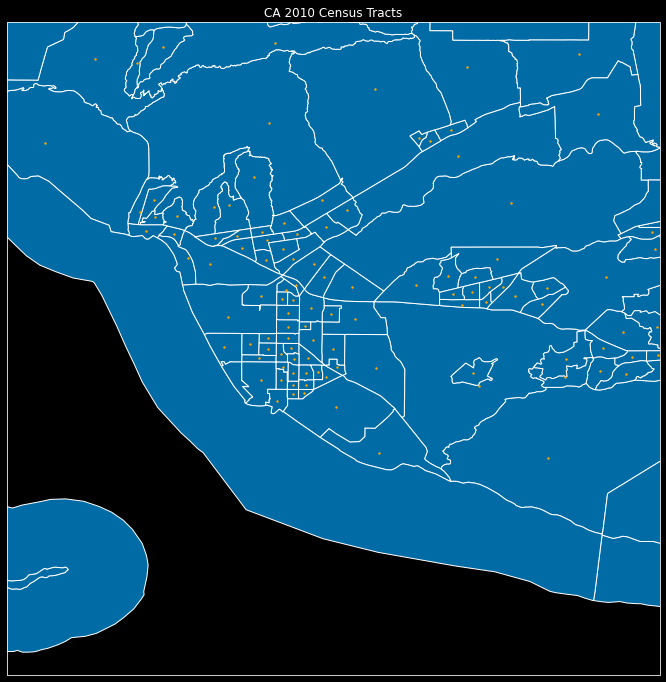

In [83]:
deg_width = .5
deg_range = np.array([-deg_width, deg_width])/2
this_observation = dfca4.loc[2156]
this_lats = np.full(2, this_observation['Latitude']) + deg_range
this_lons = np.full(2, this_observation['Longitude']) + deg_range
plot_tracts(this_lats, this_lons)

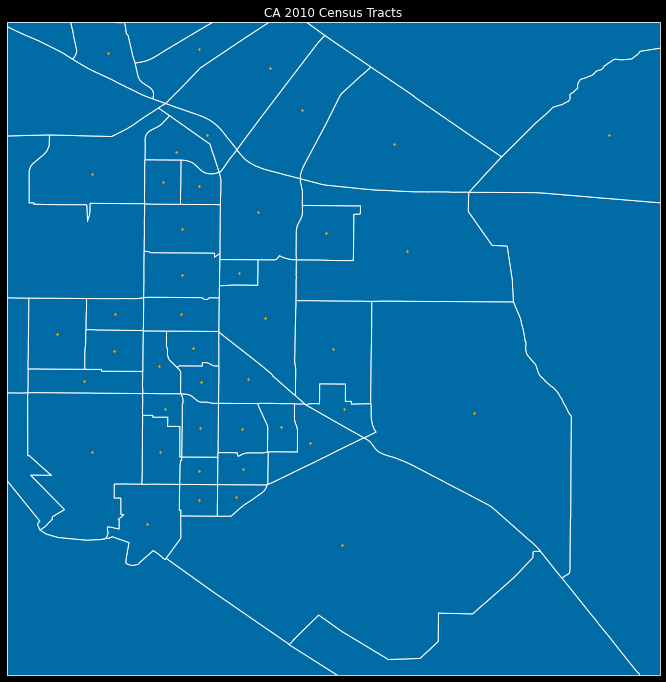

In [84]:
deg_width = .15
deg_range = np.array([-deg_width, deg_width])/2
this_observation = dfca4.loc[2156]
this_lats = np.full(2, this_observation['Latitude']) + deg_range
this_lons = np.full(2, this_observation['Longitude']) + deg_range
plot_tracts(this_lats, this_lons)

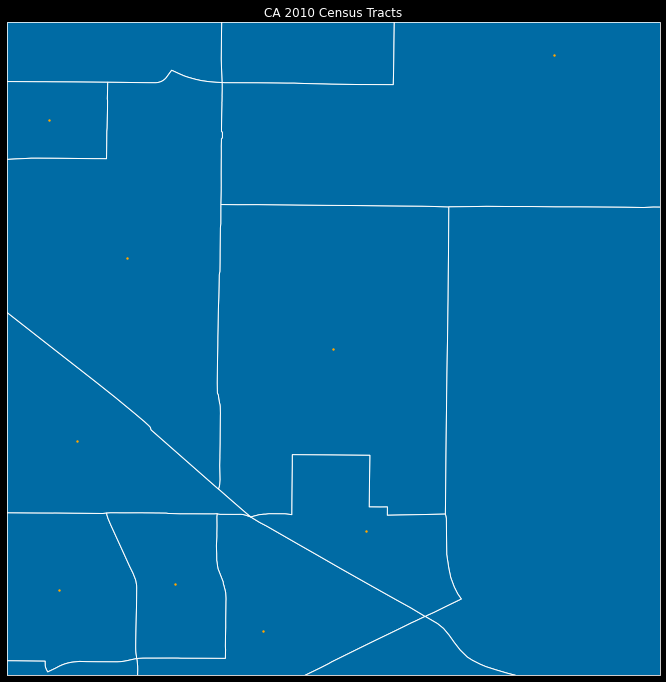

In [85]:
deg_width = .05
deg_range = np.array([-deg_width, deg_width])/2
this_observation = dfca4.loc[2156]
this_lats = np.full(2, this_observation['Latitude']) + deg_range
this_lons = np.full(2, this_observation['Longitude']) + deg_range
plot_tracts(this_lats, this_lons)

![highest-pesticide-region](pix/highpestoxnard.png)
This extremely high pesticide use area is on the edge of agricultural and city land of Oxnard.

The second highest is the tract just east of it:

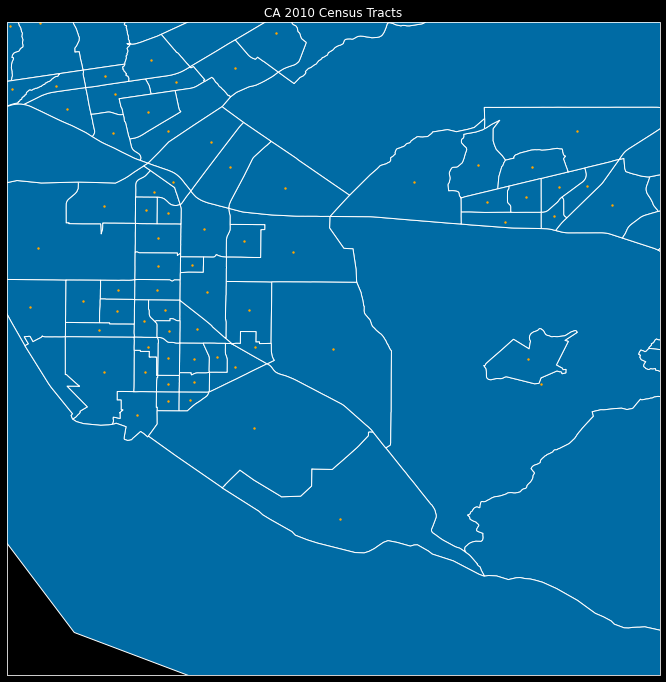

In [86]:
deg_width = .25
deg_range = np.array([-deg_width, deg_width])/2
this_observation = dfca4.loc[1901]
this_lats = np.full(2, this_observation['Latitude']) + deg_range
this_lons = np.full(2, this_observation['Longitude']) + deg_range
plot_tracts(this_lats, this_lons)

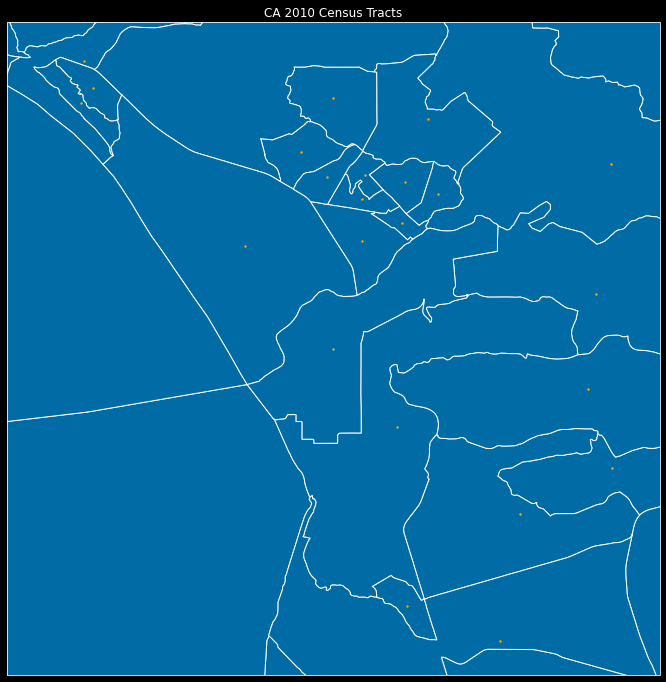

In [87]:
deg_width = .25
deg_range = np.array([-deg_width, deg_width])/2
this_observation = dfca4.loc[1536]
this_lats = np.full(2, this_observation['Latitude']) + deg_range
this_lons = np.full(2, this_observation['Longitude']) + deg_range
plot_tracts(this_lats, this_lons)

![Montery bay pesticides](pix/montereybaypesticides.png)

The third heaviest pesticide user.

In [88]:
#add to pollutants
pollutants.append(col)

# 21 Pesticides Pctl

Text(0.5, 1.0, 'pesticides percentile histogram')

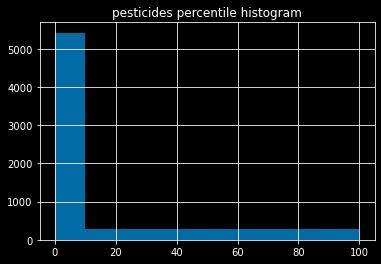

In [89]:
col = "Pesticides Pctl"
dfca4[col].hist()
plt.title("pesticides percentile histogram")

Another reflection of the extremity of a couple users. These may be typos. Investigate the liklihood of someone using this much pesticide --- maybe it's a value outside of possibility (and therefore a typo).

## 22  Tox. Release 

>Toxicity-weighted concentrations of modeled chemical releases to
air from facility emissions and off-site incineration (averaged over
2017 to 2019 and including releases from Mexican facilities
averaged over 2014 to 2016).

>Toxics Release Inventory (TRI), US Environmental Protection Agency
(US EPA)

>Facilities are required to report if they have 10 or more full-time
employees, operate within a set of industrial sectors outlined by TRI,
and manufacture more than 25,000 pounds or otherwise use more
than 10,000 pounds of any listed chemical during the calendar year.
Lower reporting thresholds apply for PBT chemicals (10 or 100
pounds) and dioxin-like chemicals (0.1 gram).

More on [dioxins from the EPA](https://www.epa.gov/dioxin/learn-about-dioxin):
> Dioxins are formed as a result of combustion processes such as ... burning fuels like wood, coal or oil.

>According to EPA’s 2006 Dioxin Inventory of Sources Report man-made emissions, including backyard and household trash burning, dominated releases in the United States. The report also acknowledges the need for more data on natural sources, such as forest fires, that can form dioxins.

### Q:
- these are toxicity-weighted concentrations. What are the units? They range up to 100,000.

In [90]:
col = 'Tox. Release'
dfca4[col].describe()

count     8035.000000
mean      1623.948874
std       3837.367500
min          0.000000
25%        111.523268
50%        456.333669
75%       1625.525848
max      96985.629960
Name: Tox. Release, dtype: float64

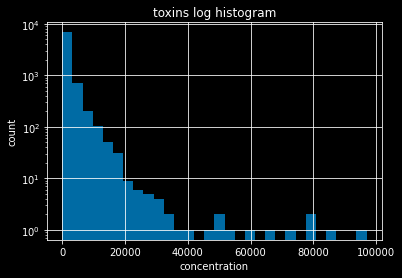

In [91]:
dfca4[col].hist(bins = 30, log = True)
plt.title("toxins log histogram")
plt.xlabel("concentration")
plt.ylabel("count");

In [92]:
# add to pollutants
pollutants.append(col)

## 23 Tox. Release Pctl

## 24 Traffic

> Sum of traffic volumes adjusted by road segment length (vehiclekilometers per hour) divided by total road length (kilometers) within
150 meters of the census tract (traffic volumes estimates for 2017).

Units are Vehicle*kilometers per hour / total road length within 150 meters of tract

This is effectively vehicles/hour.

### Q:
- why 150 meters? This is pretty short. I wonder if this is some kind of accounting for city tracts.

In [93]:
col = 'Traffic'
dfca4[col].describe()

count     8000.000000
mean      1117.448815
std        988.955819
min         20.748148
25%        553.797087
50%        881.039861
75%       1386.566214
max      45752.000000
Name: Traffic, dtype: float64

In [94]:
#add to nans
nan_cols.append(col)

Text(0.5, 1.0, 'traffic histogram')

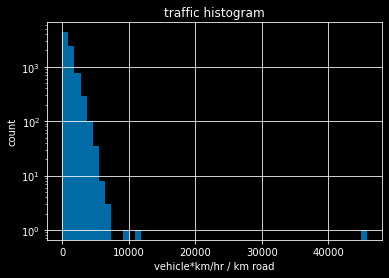

In [95]:
# look at histogram
dfca4[col].hist(bins = 50, log = True)
plt.xlabel("vehicle*km/hr / km road")
plt.ylabel('count')
plt.title("traffic histogram")

In [96]:
# there are only two above this level. What are these?
dfca4.sort_values(by = col, ascending = False).head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
2927,6073010109,5341,San Diego,92154,San Diego,-117.088418,32.549488,32.348497,63.098840,60-65%,...,69.468128,27.5,49.547739,10.8,89.185320,13.1,28.694550,50.581905,5.246988,51.348966
2004,6073010009,6978,San Diego,92173,San Diego,-117.052879,32.547376,39.834897,74.735250,70-75%,...,90.161050,62.0,92.989950,7.3,69.976575,16.9,48.517110,68.474601,7.103042,78.050933
912,6075017902,3008,San Francisco,94130,San Francisco,-122.419701,37.861948,50.629901,88.502269,85-90%,...,46.542157,66.7,95.904523,15.8,97.423217,19.7,61.520913,68.550800,7.110946,78.227433
5153,6059063805,2615,Orange,92626,Costa Mesa,-117.930051,33.689582,18.962296,35.035300,35-40%,...,21.423738,18.5,30.778894,2.3,8.693389,11.9,22.686946,31.082851,3.224302,21.558245
2545,6037550400,1226,Los Angeles,90241,Downey,-118.097691,33.936557,35.234218,67.914776,65-70%,...,NaN,16.1,24.723618,5.0,44.351900,16.7,47.617237,49.762712,5.162011,49.949571


Not too surprised by any of these. They may very well be real highways.

# 25 Traffic Pctl

# 26 Cleanup Sites 

This is a number of weighted "EnviroStor" sites. There is a metric to the weight (0 -- 12)based on distance from populated areas.

In [98]:
col = 'Cleanup Sites'
dfca4[col].describe()

count    8035.000000
mean        8.579141
std        16.386293
min         0.000000
25%         0.000000
50%         2.000000
75%        10.675000
max       300.950000
Name: Cleanup Sites, dtype: float64

Text(0, 0.5, 'tract count')

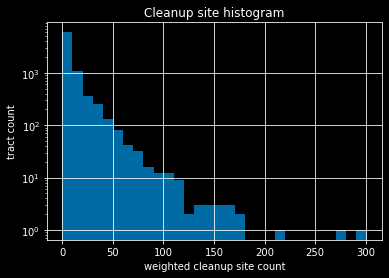

In [99]:
dfca4[col].hist(bins = 30, log = True)
plt.title("Cleanup site histogram")
plt.xlabel("weighted cleanup site count")
plt.ylabel("tract count")

# 27 Cleanup Sites Pctl

# 28  Groundwater Threats

In [100]:
col = 'Groundwater Threats'
dfca4[col].describe()

count    8035.000000
mean       16.742894
std        33.975652
min         0.000000
25%         0.000000
50%         6.000000
75%        19.000000
max       673.750000
Name: Groundwater Threats, dtype: float64

Text(0, 0.5, 'count')

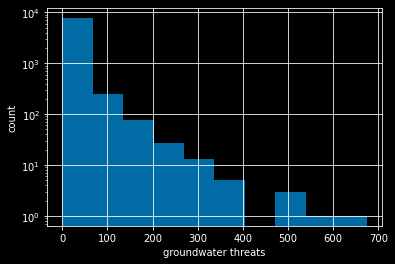

In [101]:
dfca4[col].hist(log = True)
plt.xlabel('groundwater threats')
plt.ylabel('count')

In [102]:
# 29 Groundwater pct

# 30 Haz. Waste

>Sum of weighted permitted hazardous waste facilities, hazardous
waste generators, and chrome plating facilities within each census
tract. 

In [103]:
col = 'Haz. Waste'
dfca4[col].describe()

count    8035.000000
mean        0.666388
std         1.479239
min         0.000000
25%         0.120000
50%         0.285000
75%         0.575000
max        27.925000
Name: Haz. Waste, dtype: float64

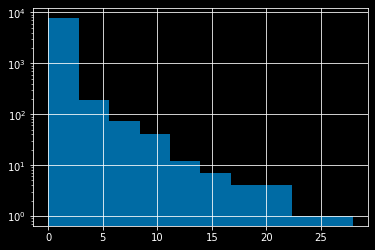

In [104]:
dfca4[col].hist(log = True);

In [105]:
# 31 haz waste pct

#  32  Imp. Water Bodies

Impaired water bodies

> Summed number of pollutants across all water bodies designated
as impaired within the area (2018).

In [106]:
col = "Imp. Water Bodies"
dfca4[col].describe()

count    8035.000000
mean        3.797386
std         4.911289
min         0.000000
25%         0.000000
50%         2.000000
75%         6.000000
max        37.000000
Name: Imp. Water Bodies, dtype: float64

Text(0, 0.5, 'count')

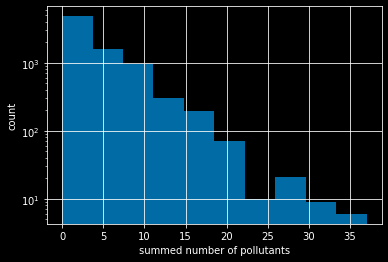

In [107]:
dfca4[col].hist(log = True)
plt.xlabel("summed number of pollutants")
plt.ylabel("count")

In [108]:
pollutants.append(col)

# 33 imp water pctl

# 34 Solid Waste

> Sum of weighted solid waste sites and facilities
(as of July 2021).

Weights are similar to the cleanup site weights

In [109]:
col = 'Solid Waste'
dfca4[col].describe()

count    8035.000000
mean        2.095277
std         4.209647
min         0.000000
25%         0.000000
50%         0.200000
75%         2.200000
max        64.250000
Name: Solid Waste, dtype: float64

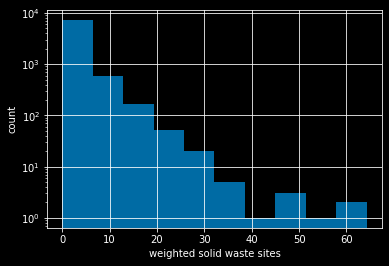

In [110]:
dfca4[col].hist(log = True);
plt.xlabel('weighted solid waste sites')
plt.ylabel("count");

In [111]:
pollutants.append(col)

# 35 Solid Waste Pctl

# 36 Pollution Burden   

>Pollution Burden scores for each census tract are derived from the average percentiles of
the seven Exposures indicators (ozone and PM2.5 concentrations, diesel PM emissions,
drinking water contaminants, children’s lead risk from housing, pesticide use, toxic releases
from facilities, and traffic density) and the five Environmental Effects indicators (cleanup
sites, impaired water bodies, groundwater threats, hazardous waste facilities and
generators, and solid waste sites and facilities).

>Indicators from the Environmental Effects component were given half the weight of the
indicators from the Exposures component. The calculated average pollution burden score
(average of the indicators) was divided by 10 and rounded to one decimal place for a
Pollution Burden score ranging from 0.1 – 10. 

### Q:
The range of values is here given to be 0.1 to 10, but the range in the data is 4 to 82. Are these percentiles?

In [112]:
col = 'Pollution Burden'
dfca4[col].describe()

count    8035.000000
mean       42.690700
std        12.757434
min         4.581979
25%        33.315833
50%        42.500265
75%        51.765395
max        81.900215
Name: Pollution Burden, dtype: float64

# 37 Pollution Burden Score

ok. These are the actual scores.

In [113]:
col = "Pollution Burden Score"
dfca4[col].describe()

count    8035.000000
mean        5.212526
std         1.557680
min         0.559459
25%         4.067857
50%         5.189274
75%         6.320544
max        10.000000
Name: Pollution Burden Score, dtype: float64

Text(0, 0.5, 'count')

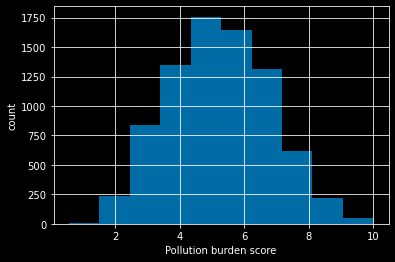

In [114]:
dfca4[col].hist()
plt.xlabel("Pollution burden score")
plt.ylabel("count")

## 38 Pollution Burden Pctl

# 39 Asthma

> Spatially modeled, age-adjusted rate of ED visits for asthma per
10,000 (averaged over 2015-2017).


In [115]:
col = 'Asthma'
dfca4[col].describe()

count    8024.000000
mean       51.979667
std        30.571653
min         4.280000
25%        30.057500
50%        45.710000
75%        65.800000
max       243.290000
Name: Asthma, dtype: float64

In [116]:
nan_cols.append(col)

Text(0, 0.5, 'count')

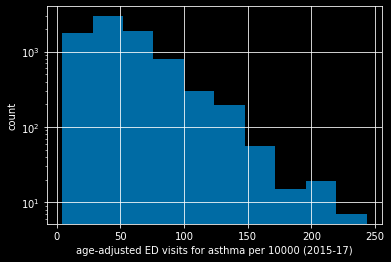

In [117]:
dfca4[col].hist(log = True)
plt.xlabel("age-adjusted ED visits for asthma per 10000 (2015-17)")
plt.ylabel('count')

In [118]:
# 40 asthma pctl

# 41 Low Birth Weight   

In [119]:
col = 'Low Birth Weight'
dfca4[col].describe()

count    7808.000000
mean        5.003372
std         1.588549
min         0.000000
25%         3.930000
50%         4.915000
75%         6.000000
max        13.710000
Name: Low Birth Weight, dtype: float64

In [120]:
nan_cols.append(col)

Text(0, 0.5, 'count')

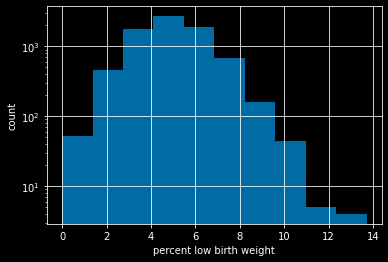

In [121]:
dfca4[col].hist(log = True)
plt.xlabel("percent low birth weight")
plt.ylabel('count')

In [122]:
#42 low birth pctl

# 43 Cardiovascular Disease

> Age-adjusted rate of emergency department visits for heart attacks per 10,000

In [123]:
col = "Cardiovascular Disease"
dfca4[col].describe()

count    8024.000000
mean       13.413310
std         5.197289
min         2.860000
25%         9.450000
50%        12.420000
75%        16.750000
max        40.850000
Name: Cardiovascular Disease, dtype: float64

In [124]:
nan_cols.append(col)

Text(0, 0.5, 'count')

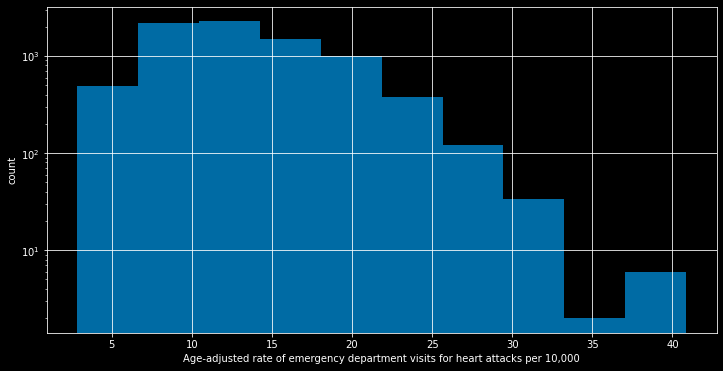

In [125]:
dfca4[col].hist(log = True, figsize = (12,6)),
plt.xlabel("Age-adjusted rate of emergency department visits for heart attacks per 10,000")
plt.ylabel("count")

In [126]:
#44 cardiovascular disease pctl

# 45 Education

>Percentage of the population over age 25 with less than a high
school education (5-year estimate, 2015-2019).

In [127]:
col = "Education"
dfca4[col].describe()

count    7932.000000
mean       17.500656
std        14.617790
min         0.000000
25%         5.800000
50%        12.700000
75%        26.000000
max        76.300000
Name: Education, dtype: float64

In [128]:
nan_cols.append(col)

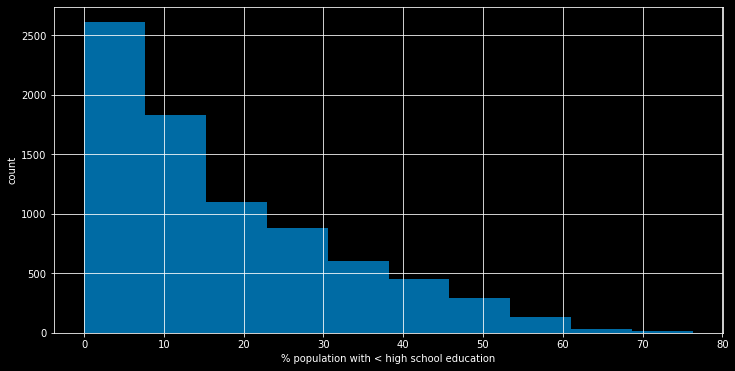

In [129]:
dfca4[col].hist(figsize = (12,6))
plt.xlabel("% population with < high school education")
plt.ylabel("count");


In [130]:
# 46 education pctl

# 47  Linguistic Isolation

>Indicator Percentage of limited English-speaking households, (2015-2019).

>The US Census Bureau uses the term
“linguistic isolation” to measure households where all members 14 years of age or above
have at least some difficulty speaking English. A high degree of linguistic isolation among
members of a community raises concerns about access to health information and public
services, and effective engagement with regulatory processes. Information on language
use is collected annually in the ACS. In contrast to the decennial census, the ACS surveys
a small sample of the US population to estimate more detailed economic and social
information for the country’s population.


In [131]:
col = "Linguistic Isolation"
dfca4[col].describe()

count    7715.000000
mean        9.732353
std         9.514374
min         0.000000
25%         2.800000
50%         6.900000
75%        13.900000
max       100.000000
Name: Linguistic Isolation, dtype: float64

In [133]:
nan_cols.append(col)

Text(0, 0.5, 'count')

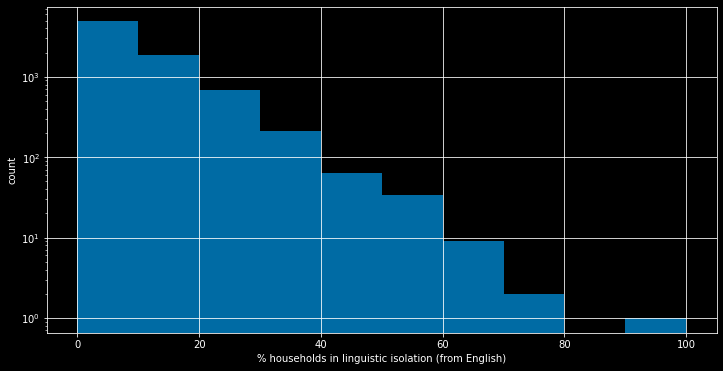

In [134]:
dfca4[col].hist(log = True, figsize = (12,6));
plt.xlabel("% households in linguistic isolation (from English)")
plt.ylabel("count")

In [135]:
# 48 linguistic isolation pctl

# 49 Poverty  

> Percent of the population living below **two times** the federal poverty
level (5-year estimate, 2015-2019).


In [136]:
col = "Poverty"
dfca4[col].describe()

count    7960.000000
mean       31.342211
std        18.270359
min         1.000000
25%        16.300000
50%        27.700000
75%        44.300000
max        96.700000
Name: Poverty, dtype: float64

In [137]:
nan_cols.append(col)

Text(0, 0.5, 'count')

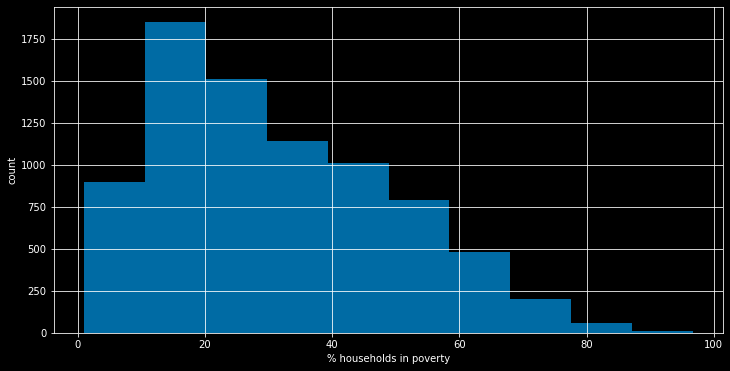

In [138]:
dfca4[col].hist(figsize = (12,6))
plt.xlabel('% households in poverty')
plt.ylabel('count')

In [139]:
#50 poverty pctl

# 51  Unemployment 

> Percentage of the population over the age of 16 that is unemployed
and eligible for the labor force. Excludes retirees, students,
homemakers, institutionalized persons except prisoners, those not
looking for work, and military personnel on active duty (5-year
estimate, 2015-2019).

In [140]:
col = "Unemployment"
dfca4[col].describe()

count    7700.000000
mean        6.276896
std         3.837149
min         0.000000
25%         3.600000
50%         5.500000
75%         8.000000
max        43.900000
Name: Unemployment, dtype: float64

In [141]:
nan_cols.append(col)

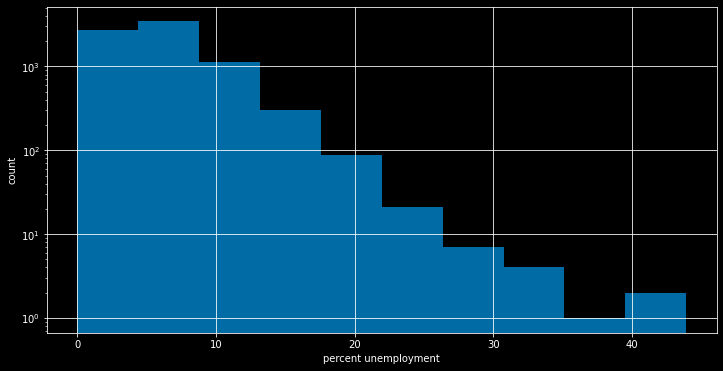

In [142]:
dfca4[col].hist(log = True, figsize = (12,6))
plt.xlabel("percent unemployment")
plt.ylabel("count");

In [143]:
# 52 unemployment 

# 53  Housing Burden

>Housing-Burdened Low-Income Households. Percent of households
in a census tract that are both low income (making less than 80% of
the HUD Area Median Family Income) and severely burdened by
housing costs (paying greater than 50% of their income to housing
costs). (5-year estimates, 2013-2017).

This is surely collinear with poverty --- this division captures impoverished homes from the lowest incomes up.


In [144]:
col = 'Housing Burden'
dfca4[col].describe()

count    7890.000000
mean       18.490570
std         8.257466
min         0.800000
25%        12.400000
50%        17.200000
75%        23.300000
max        78.200000
Name: Housing Burden, dtype: float64

In [145]:
nan_cols.append(col)

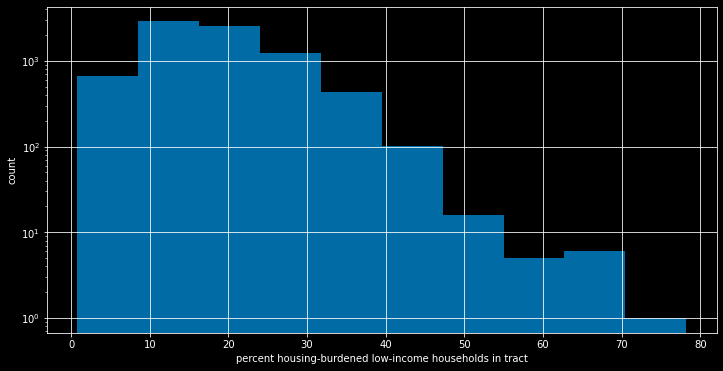

In [146]:
dfca4[col].hist(log = True, figsize=(12,6))
plt.xlabel("percent housing-burdened low-income households in tract")
plt.ylabel("count");

In [147]:
# 54 housing burden pctl

# 55  Pop. Char.

In [148]:
col = 'Pop. Char. '
dfca4[col].describe()

count    7932.000000
mean       49.854979
std        20.571240
min         3.241201
25%        33.463118
50%        49.815416
75%        66.420609
max        96.401800
Name: Pop. Char. , dtype: float64

In [149]:
nan_cols.append(col)

Text(0.5, 0, 'pop char')

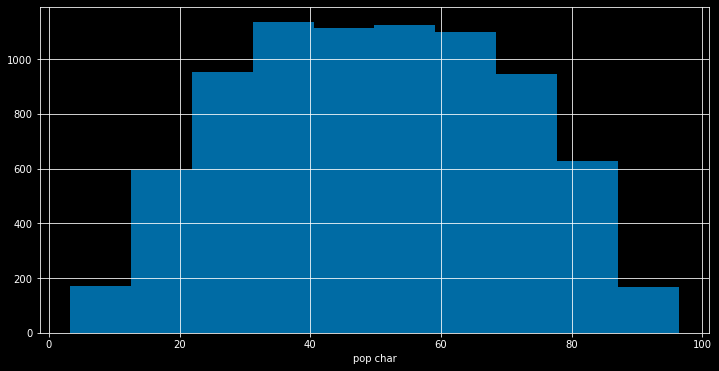

In [150]:
dfca4[col].hist(figsize = (12,6))
plt.xlabel('pop char')

# 56 Pop. Char. Score

In [151]:
col = 'Pop. Char. Score'
dfca4[col].describe()

count    7932.000000
mean        5.171582
std         2.133906
min         0.336218
25%         3.471213
50%         5.167478
75%         6.889976
max        10.000000
Name: Pop. Char. Score, dtype: float64

In [152]:
nan_cols.append(col)

Text(0, 0.5, 'count')

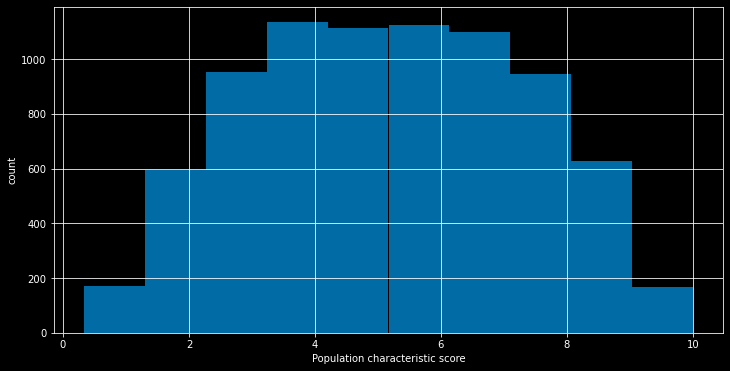

In [153]:
dfca4[col].hist(figsize = (12,6))
plt.xlabel("Population characteristic score")
plt.ylabel('count')

[Column list](#Column-list)

# NaN value columns

These don't include some of the percentile / duplicate columns.

A good choice for many of these is to replace nans with median values.

In [154]:
nan_cols

['CES 4.0 Score',
 'CES 4.0 Percentile',
 'CES 4.0 Percentile Range',
 'Drinking Water',
 'Lead',
 'Traffic',
 'Traffic',
 'Asthma',
 'Low Birth Weight',
 'Cardiovascular Disease',
 'Education',
 'Linguistic Isolation',
 'Poverty',
 'Unemployment',
 'Housing Burden',
 'Pop. Char. ',
 'Pop. Char. Score']

In [164]:
# with scores
# number_cols = [
#  'Total Population',
#  'Longitude',
#  'Latitude',
#  'CES 4.0 Score',
#  'Ozone',
#  'PM2.5',
#  'Diesel PM',
#  'Drinking Water',
#  'Lead',
#  'Pesticides',
#  'Tox. Release',
#  'Traffic',
#  'Cleanup Sites',
#  'Groundwater Threats',
#  'Haz. Waste',
#  'Imp. Water Bodies',
#  'Solid Waste',
#  'Pollution Burden Score',
#  'Asthma',
#  'Low Birth Weight',
#  'Cardiovascular Disease',
#  'Education',
#  'Linguistic Isolation',
#  'Poverty',
#  'Unemployment',
#  'Housing Burden',
#  'Pop. Char. Score']


#without scores
number_cols = [
 'Total Population',
 'Longitude',
 'Latitude',
 'Ozone',
 'PM2.5',
 'Diesel PM',
 'Drinking Water',
 'Lead',
 'Pesticides',
 'Tox. Release',
 'Traffic',
 'Cleanup Sites',
 'Groundwater Threats',
 'Haz. Waste',
 'Imp. Water Bodies',
 'Solid Waste',
 'Asthma',
 'Low Birth Weight',
 'Cardiovascular Disease',
 'Education',
 'Linguistic Isolation',
 'Poverty',
 'Unemployment',
 'Housing Burden']


# Correlations

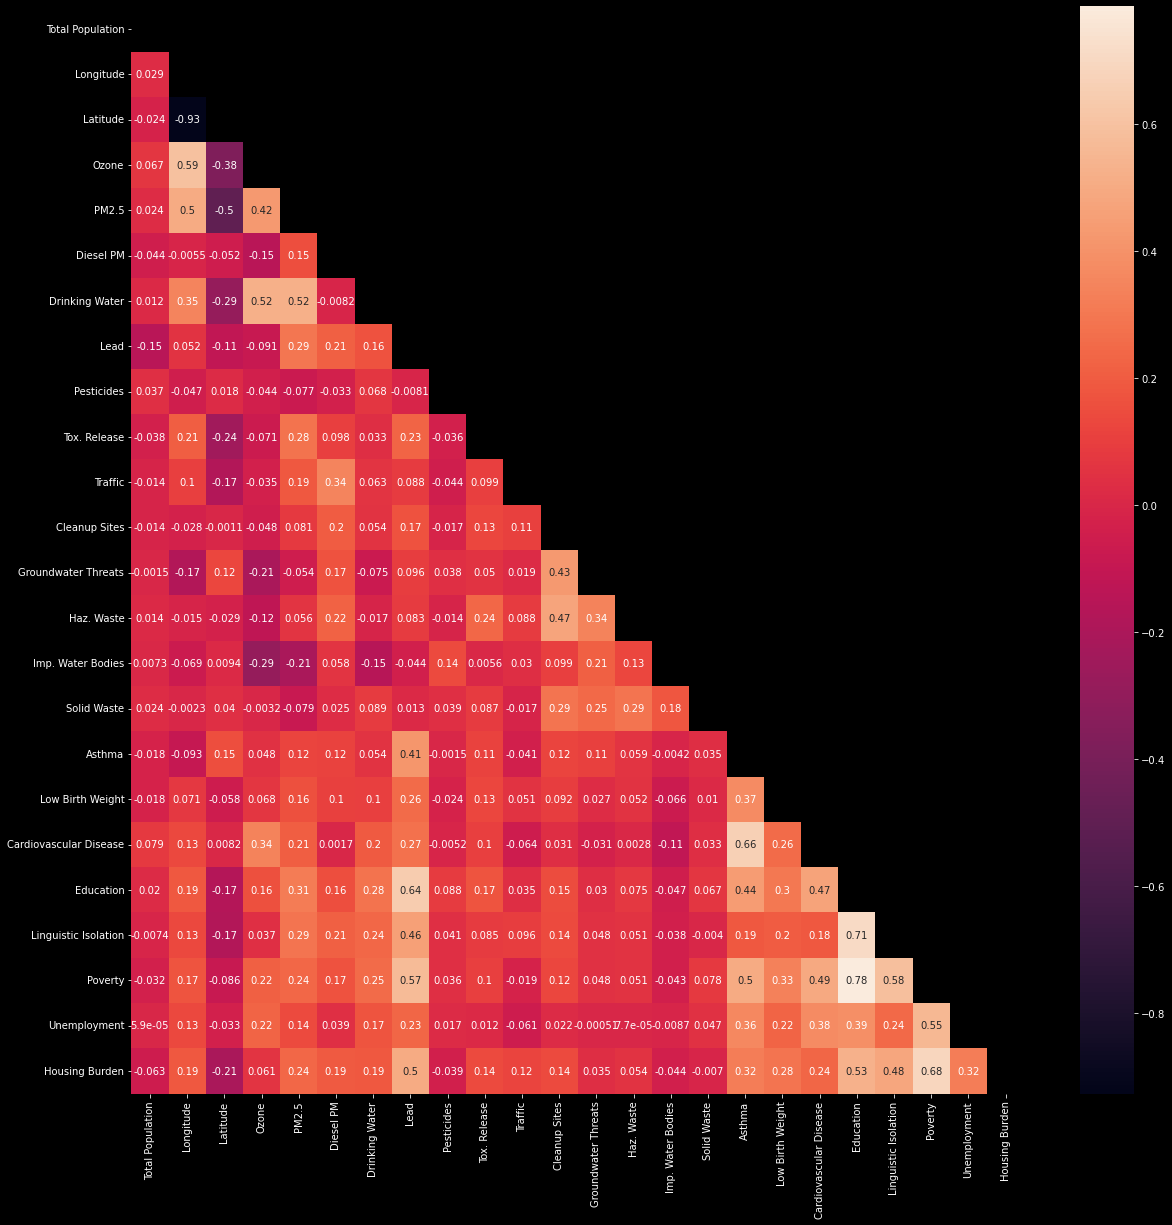

In [178]:
corr = dfca4[number_cols].corr()
plt.figure(figsize = (20,20))
my_mask = np.zeros_like(corr)
my_mask[np.triu_indices_from(my_mask)] = True
sns.heatmap(corr, annot = True, mask = my_mask);

Latitude and longitude are correlated because California is a \  shaped state.

A lot of the others come together -- poverty, housing burden, education, linguistic isolation, disease and exposure to pollutants.

Correlations between these values and lat/lon are probably due to regions, geography affecting poverty / other socioeconomic factors rather than fundamentally depending on north-south / east-west

# A quick regression

Just to see the limits of the data, perform a linear regression on all features.

In a later notebook on linear regressions, we are sure to avoid the CAES score and population characteristics, since these are themselves dependent on these health data.

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

dfca4_dropna = dfca4.dropna()

lr = LinearRegression()

X = dfca4_dropna[number_cols].drop(columns = ['Asthma','Cardiovascular Disease', 'Low Birth Weight'])
asthma = dfca4_dropna['Asthma']
cvd = dfca4_dropna['Cardiovascular Disease']
lbw = dfca4_dropna['Low Birth Weight']

Xa_train, Xa_test, asthma_train, asthma_test = train_test_split(X, asthma, random_state=0)
lr.fit(Xa_train, asthma_train)
lr.score(Xa_train, asthma_train), lr.score(Xa_test, asthma_test)

(0.40513711121787266, 0.40285618809308166)

## Look at unique zips for each CAES set. 
4/20/22

This section checks all of the zip codes and census tracts in CAESes 1 through 4. It verifies uniqueness and looks for any differences between sets. It also notes some 2-digit zip codes, which all belong to national forests, and are therefore left in the set.

It finishes by creating a pair of dictionaries which can translate between census tract and zip code. It saves these dictionaries in `/CA_zip_tract_translation/`.

In [2]:
# list raw data files
data_folder = '../raw_data/'
raw_data_files = os.listdir(data_folder)
raw_data_files

['calenviroscreen-3.0-results-june-2018-update.csv',
 'calenviroscreen2-final-report.csv',
 'calenviroscreen40resultsdatadictionary_F_2021.xlsx',
 'calenviroscreendatav11.xls',
 'cbp12',
 'cbp13',
 'cbp14',
 'cbp15',
 'cbp16',
 'cbp17',
 'cbp18',
 'cbp19',
 'LA_Building_Permits.csv',
 'links',
 'naics2017.txt',
 'naics2017_UTF8.txt']

In [8]:
caes1_full = pd.read_excel(data_folder + 'calenviroscreendatav11.xls')
caes2_full = pd.read_csv(data_folder + 'calenviroscreen2-final-report.csv')
caes3_full = pd.read_csv(data_folder + 'calenviroscreen-3.0-results-june-2018-update.csv')
caes4_full = pd.read_excel(data_folder + 'calenviroscreen40resultsdatadictionary_F_2021.xlsx')

In [9]:
caes1_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1769 entries, 0 to 1768
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ZIP Code                   1769 non-null   int64  
 1   Total Population           1769 non-null   int64  
 2   Ozone                      1631 non-null   float64
 3   Ozone Pctl                 1631 non-null   float64
 4   PM2.5                      1633 non-null   float64
 5   PM2.5 Pctl                 1633 non-null   float64
 6   Diesel PM                  1769 non-null   float64
 7   Diesel PM Pctl             1769 non-null   float64
 8   Pesticides                 1769 non-null   float64
 9   Pesticides Pctl            1769 non-null   float64
 10  TRI                        1769 non-null   float64
 11  TRI Pctl                   1769 non-null   float64
 12  Traffic                    1769 non-null   float64
 13  Traffic Pctl               1769 non-null   float

In [10]:
caes2_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Census Tract               8035 non-null   int64  
 1   Total Population           8035 non-null   int64  
 2   California County          8035 non-null   object 
 3   Click for interactive map  0 non-null      float64
 4   CES 2.0 Score              7973 non-null   float64
 5   CES 2.0 Percentile Range   7973 non-null   object 
 6   Hyperlink                  8035 non-null   object 
 7   Ozone                      7970 non-null   float64
 8   Ozone Pctl                 7970 non-null   float64
 9   PM2.5                      7944 non-null   float64
 10  PM2.5 Pctl                 7944 non-null   float64
 11  Diesel PM                  8035 non-null   float64
 12  Diesel PM Pctl             8035 non-null   float64
 13  Drinking Water             8000 non-null   float

In [11]:
caes3_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 57 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Census Tract                                       8035 non-null   int64  
 1   Total Population                                   8035 non-null   int64  
 2   California County                                  8035 non-null   object 
 3   ZIP                                                8035 non-null   int64  
 4   Nearby City 
(to help approximate location only)  8035 non-null   object 
 5   Longitude                                          8035 non-null   float64
 6   Latitude                                           8035 non-null   float64
 7   CES 3.0 Score                                      7929 non-null   float64
 8    CES 3.0 Percentile                                7929 non-null   float64
 9   CES 3.0 


In [12]:
caes4_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   int64  
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   int64  
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                7932 non-null   float64
 8    CES 4.0 Percentile          7932 non-null   float64
 9   CES 4.0 Percentile Range     7932 non-null   object 
 10  Ozone                        8035 non-null   float64
 11  Ozone Pctl                   8035 non-null   float64
 12  PM2.5                        8035 non-null   float64
 13  PM2.5 Pctl        



CAES 1 only has zip codes.
CAES 2 only has census tracts.

I hope there is only 1 zip code for each tract.

CAES 3 and 4 give us a rosetta stone to link tract to zip.

In [13]:
#Grab just the zips and tracts.
caes1 = caes1_full[['ZIP Code']]
caes2 = caes2_full[['Census Tract']]
caes3 = caes3_full[['Census Tract', 'ZIP']]
caes4 = caes4_full[['Census Tract', 'ZIP']]

In [14]:
caes1

,ZIP Code
0,93706
1,93307
2,95205
3,93702
4,90058
...,...
1764,91608
1765,92132
1766,93410
1767,94850


In [15]:
caes2

,Census Tract
0,6019001100
1,6019000300
2,6019000200
3,6019001500
4,6019000600
...,...
8030,6085504700
8031,6095253000
8032,6095980000
8033,6109985202


In [16]:
caes3

,Census Tract,ZIP
0,6019001100,93706
1,6071001600,91761
2,6019000200,93706
3,6077000801,95203
4,6019001500,93725
...,...,...
8030,6009000504,95223
8031,6065940100,92239
8032,6053011502,93923
8033,6083980100,57


In [17]:
caes4

,Census Tract,ZIP
0,6019001100,93706
1,6077000700,95206
2,6037204920,90023
3,6019000700,93706
4,6019000200,93706
...,...,...
8030,6107004000,93257
8031,6109985202,95327
8032,6111001206,93001
8033,6111003012,93036


In [18]:
caes4.sort_values(by = 'ZIP')

,Census Tract,ZIP
4544,6083001800,32
5057,6093001200,35
5833,6105000400,39
6343,6109004200,40
5143,6033000100,48
...,...,...
7680,6057001203,96161
6606,6057001206,96161
7258,6061022011,96161
7810,6057001204,96161


I think the fact that there's only 1 zip for each of these census tracts, but multiple zips per tract, proves this. Otherwise ZIP would need to be more than one column, or have longer values (like '96161, 97000').

We can make a dictionary with this.

In [37]:
#how many unique zips in caes 4?
len(caes4['ZIP'].unique())

1355

In [38]:
#how many in caes 3?
len(caes3['ZIP'].unique())

1355

In [39]:
#how many in caes 1?
len(caes1['ZIP Code'].unique())

1769

Were [zip codes rewritten at some point after caes1?](https://www.zip-codes.com/state/ca.asp)
It looks like caes 1 includes 89---- zip codes. [89010 is for Dyer, Nevada](https://www.unitedstateszipcodes.org/89010/), on the border. Perhaps all these are extras in the area that were measured.

In [19]:
caes1['ZIP Code'].sort_values()

1651    89010
1405    89019
1743    89060
1755    89061
1701    89439
        ...  
1554    96148
1296    96150
1153    96155
1475    96161
1571    97635
Name: ZIP Code, Length: 1769, dtype: int64

In [73]:
#mark which rows have zip codes of the right length and are in cali.



# add_cali_code_checks adds two bool columns to a dataframe that tell if the zip code is in the expected format.
# returns a copy, not the original dataframe.
def add_cali_code_checks(input_caes_dataframe, zip_string = 'ZIP', inplace = False):
    if inplace:
        this_caes_dataframe = input_caes_dataframe
    else:
        this_caes_dataframe = input_caes_dataframe.copy()
    this_caes_dataframe['starts with 9'] = this_caes_dataframe[zip_string].apply(lambda zip_code: True if str(zip_code).startswith('9') else False)
    this_caes_dataframe['is 5 digits'] = this_caes_dataframe[zip_string].apply(lambda zip_code: True if len(str(zip_code)) == 5 else False)
    if inplace:
        return None
    else:
        return this_caes_dataframe

# 
# caes1['starts_with_9'] = caes1['ZIP Code'].apply(lambda zip_code: True if str(zip_code).startswith('9') else False)
# caes1['is_5_digits'] = caes1['ZIP Code'].apply(lambda zip_code: True if len(str(zip_code)) == 5 else False)


# get_bad_zips gets a DataFrame, and returns a new DataFrame with any rows whose zip doesn't start with 9 or have five digits.
def get_bad_zips(input_caes_dataframe, zip_string = "ZIP"):
    # get indices whose zips don't start with 9
    bad_zips_truth_values = input_caes_dataframe[zip_string].apply(lambda zip_code: False if str(zip_code).startswith('9') else True)
    bad_zips_indices = input_caes_dataframe[bad_zips_truth_values].index
    # turn it into a list
    bad_zips_indices = bad_zips_indices.to_list()
    # get indices whose zips don't have 5 digits.
    not_length_5_truth_values = input_caes_dataframe[zip_string].apply(lambda zip_code: False if len(str(zip_code))==5 else True)
    not_length_5_indices = input_caes_dataframe[not_length_5_truth_values].index
    # make it a list too
    not_length_5_indices = not_length_5_indices.to_list()
    # put them them together. use a set to get unique indices.
    bad_zips_indices =  set(bad_zips_indices + not_length_5_indices)
    # a dataframe of all the observations whose zips don't start with 9
    bad_zibs_df = input_caes_dataframe.loc[bad_zips_indices]
    return bad_zibs_df

In [77]:
#show the records of places with unexpected zips for CAES 1. They're all from Nevada.
get_bad_zips(caes1_full, zip_string='ZIP Code')

,ZIP Code,Total Population,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Pesticides,Pesticides Pctl,...,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Pop. Char.,Pop. Char. Score,CES 1.1 Score,CES 1.1 Percentile Range
1701,89439,1417,0.0,0.0,8.29,26.03,0.001,0.06,0.000,0.0,...,7.9,29.15,NaN,NaN,20.0,25.43,44.0,4.4,2.41,1-5% (lowest scores)
1743,89060,10227,NaN,NaN,NaN,NaN,0.005,0.62,0.000,0.0,...,21.8,69.32,NaN,NaN,47.2,77.35,80.9,8.1,0.73,1-5% (lowest scores)
1651,89010,415,NaN,NaN,NaN,NaN,1.050,28.83,0.000,0.0,...,37.9,89.11,NaN,NaN,41.5,67.65,82.7,8.3,3.72,6-10%
1755,89061,5252,NaN,NaN,NaN,NaN,0.009,0.73,0.000,0.0,...,19.7,64.33,0.0,0.0,38.4,61.54,55.2,5.5,0.09,1-5% (lowest scores)
1405,89019,2673,NaN,NaN,NaN,NaN,0.046,4.13,0.188,24.5,...,15.4,54.47,12.7,70.1,45.2,74.26,64.6,6.5,7.88,21-25%


In [129]:
#cut them out. Nevada isn't California.
caes1 = caes1.drop(get_bad_zips(caes1, zip_string='ZIP Code').index)
caes1

,ZIP Code
0,93706
1,93307
2,95205
3,93702
4,90058
...,...
1764,91608
1765,92132
1766,93410
1767,94850


In [82]:
#show records to toss for CAES 3. These are the national parks/forests, channel islands,. I believe this verifies another analysis in the group.
get_bad_zips(caes3_full, zip_string='ZIP')

,Census Tract,Total Population,California County,ZIP,Nearby City \r\n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \r\nPercentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
5408,6083001800,1245,Santa Barbara,32,Los Padres NTL Forest,-119.717740,34.777648,17.54,31.79,30-35%,...,66.35,45.5,67.66,7.3,32.10,16.7,43.59,36.67,3.80,29.74
8033,6083980100,11,Santa Barbara,57,Channel Islands,-120.048221,33.948186,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8034,6111980000,56,Ventura,61,Channel Is Air Guard Station,-119.503588,33.255655,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6859,6017030603,3566,El Dorado,51,Eldorado NTL Forest,-120.422095,38.882147,10.09,13.49,10-15%,...,0.00,31.0,46.35,10.2,57.71,20.7,62.07,31.38,3.25,21.94
6617,6093001200,1409,Siskiyou,35,Modoc Shasta Klamath for,-121.826057,41.411603,11.62,16.55,15-20%,...,1.63,39.1,58.16,14.0,80.26,15.8,39.08,48.46,5.03,47.71
7149,6105000400,975,Trinity,39,Southeast Trinity County,-123.210947,40.069602,8.57,9.84,5-10%,...,NaN,51.2,74.63,NaN,NaN,15.4,36.94,42.66,4.42,38.59
5392,6033000100,3121,Lake,48,Mendocino NTL Forest,-122.909601,39.335491,17.60,32.00,30-35%,...,4.29,56.0,80.11,19.9,95.33,24.4,75.01,46.96,4.87,45.57
4857,6109004200,3954,Tuolumne,40,Yosemite NTL Park,-119.640723,37.949499,20.15,38.74,35-40%,...,0.00,35.5,53.16,14.1,80.71,10.7,15.45,55.04,5.71,57.49


All of these are national forests or a special island. Southeast Trinity County forest is part of the Mendocino forest.

In [83]:
get_bad_zips(caes4_full, zip_string="ZIP")

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
4544,6083001800,1050,Santa Barbara,32,Unincorporated Santa Barbara County area,-119.717740,34.777648,22.281902,42.713061,40-45%,...,86.899445,38.5,66.871859,9.3,83.224883,10.6,16.311787,39.005295,4.046117,33.862834
5057,6093001200,1261,Siskiyou,35,Unincorporated Siskiyou County area,-121.826057,41.411603,19.513579,36.245587,35-40%,...,NaN,36.0,63.241206,13.7,95.288912,10.9,17.934094,62.053356,6.436950,68.772063
8034,6111980000,118,Ventura,61,Unincorporated Ventura County area,-119.503588,33.255655,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6343,6109004200,3487,Tuolumne,40,Unincorporated Tuolumne County area,-119.640723,37.949499,12.828329,20.032779,20-25%,...,0.000000,29.0,52.261307,4.6,39.211348,9.7,12.788340,40.278108,4.178149,35.816944
5833,6105000400,894,Trinity,39,Unincorporated Trinity County area,-123.210947,40.069602,15.397582,26.462431,25-30%,...,12.275003,60.3,91.846734,NaN,NaN,37.5,97.629911,55.341376,5.740699,58.295512
6579,6017030603,3668,El Dorado,51,Unincorporated El Dorado County area,-120.422095,38.882147,11.697855,17.057489,15-20%,...,0.000000,26.9,48.442211,5.3,48.256117,17.9,53.624842,33.353853,3.459879,24.873928
5143,6033000100,3376,Lake,48,Unincorporated Lake County area,-122.909601,39.335491,18.998409,35.161372,35-40%,...,13.303559,38.5,66.871859,13.1,94.521083,16.7,47.617237,48.453698,5.026223,48.020676
8025,6083980100,10,Santa Barbara,57,Unincorporated Santa Barbara County area,-120.048221,33.948186,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These are all the same national forests. We will keep these.

In [131]:
caes1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1764 entries, 0 to 1768
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ZIP Code  1764 non-null   int64
dtypes: int64(1)
memory usage: 92.1 KB


In [132]:
caes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Census Tract  8035 non-null   int64
dtypes: int64(1)
memory usage: 62.9 KB


In [133]:
caes3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Census Tract  8035 non-null   int64
 1   ZIP           8035 non-null   int64
dtypes: int64(2)
memory usage: 125.7 KB


In [134]:
caes4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Census Tract  8035 non-null   int64
 1   ZIP           8035 non-null   int64
dtypes: int64(2)
memory usage: 125.7 KB


There are 1764 unique ZIPs that start with 9 and have 5 digits in CAES 1.

[From this site:](https://www.unitedstateszipcodes.org/zip-code-database/changes/).

> It is typical for 10-20 new ZIP codes to be created each year - many of which are for military uses.

> Over 1,000 ZIP codes have been decomissioned as post offices close or the needs of the United States Postal Service change.

According to [this page,](https://worldpopulationreview.com/zips/california) there are currently 1741 zip codes in california. Accessed 4/20/22. Goodness gracious.

In [139]:
#a list of the unique zips in caes 3 
caes3

,Census Tract,ZIP
0,6019001100,93706
1,6071001600,91761
2,6019000200,93706
3,6077000801,95203
4,6019001500,93725
...,...,...
8030,6009000504,95223
8031,6065940100,92239
8032,6053011502,93923
8033,6083980100,57


In [140]:
caes4

,Census Tract,ZIP
0,6019001100,93706
1,6077000700,95206
2,6037204920,90023
3,6019000700,93706
4,6019000200,93706
...,...,...
8030,6107004000,93257
8031,6109985202,95327
8032,6111001206,93001
8033,6111003012,93036


In [161]:
#check that caes3 and 4 agree.
caes4['ZIP'].sort_values().to_list() == caes3['ZIP'].sort_values().to_list()

True

In [163]:
caes4['Census Tract'].sort_values().to_list()  == caes3['Census Tract'].sort_values().to_list()

True

## Save zip-to-tract dictionaries

These are used later to find the corresponding zip code for the CAES data that only has census tract.

In [170]:
# They're the same. Make a dictionary out of one of them. 
tract_to_zip_dict = dict(caes3.to_dict('split')['data'])
tract_to_zip_dict

{6019001100: 93706,
 6071001600: 91761,
 6019000200: 93706,
 6077000801: 95203,
 6019001500: 93725,
 6037204920: 90023,
 6077000300: 95203,
 6019001000: 93706,
 6037206050: 90023,
 6019000400: 93721,
 6099002100: 95354,
 6029002500: 93307,
 6019000600: 93721,
 6019001201: 93725,
 6037205120: 90023,
 6019000902: 93706,
 6037291220: 90247,
 6019001202: 93725,
 6019000800: 93706,
 6019000300: 93706,
 6037239202: 90001,
 6037226002: 90021,
 6077000700: 95206,
 6019000901: 93706,
 6077000100: 95202,
 6099002302: 95351,
 6071004900: 92410,
 6037535400: 90002,
 6019000700: 93706,
 6065030300: 92501,
 6019007100: 93662,
 6037243100: 90059,
 6037543305: 90220,
 6071005701: 92401,
 6037204600: 90023,
 6037227010: 90011,
 6099002301: 95351,
 6019000100: 93721,
 6077001900: 95205,
 6037206032: 90033,
 6037226001: 90021,
 6037239501: 90001,
 6019002000: 93728,
 6077005119: 95330,
 6037203100: 90033,
 6037530700: 90063,
 6073005000: 92113,
 6037301601: 91201,
 6037185320: 90065,
 6037543202: 90220,


In [177]:
# take it for a spin
tract_to_zip_dict[6019000902]

93706

In [223]:
# flip it to translate the other direction. There are multiple tracts per zip, so this dict will return a list of tracts.
# This might be a problem for a pivot table?

# I'll do it this way instead:
zip_to_tract_dict = {
    zip_code:caes3.loc[caes3['ZIP']==zip_code,'Census Tract'].to_list()   
    for zip_code in caes3['ZIP']
}

In [225]:
zip_to_tract_dict[93706]

[6019001100,
 6019000200,
 6019001000,
 6019000902,
 6019000800,
 6019000300,
 6019000901,
 6019000700,
 6019001800,
 6019001900,
 6019007600]

In [226]:
#save these so we can use them elsewhere.
import json

#save the zip to tract dict
ztt_json = json.dumps(zip_to_tract_dict)
zip_to_tract_dict_filepath = '../CA_zip_tract_translation/' + 'zip_to_tract.json'
with open(zip_to_tract_dict_filepath,'w') as zttfile:
    zttfile.write(ztt_json)
    zttfile.close()
    
#save the tract to zip dict
ttz_json = json.dumps(tract_to_zip_dict)
tract_to_zip_dict_filepath = '../CA_zip_tract_translation/' + 'tract_to_zip.json'
with open(tract_to_zip_dict_filepath, 'w') as ttzfile:
    ttzfile.write(ttz_json)
    ttzfile.close()

In [227]:
#make sure they saved right
with open(zip_to_tract_dict_filepath, 'r') as hiiii:
    hey = json.load(hiiii)
hey

{'93706': [6019001100,
  6019000200,
  6019001000,
  6019000902,
  6019000800,
  6019000300,
  6019000901,
  6019000700,
  6019001800,
  6019001900,
  6019007600],
 '91761': [6071001600,
  6071001813,
  6071001803,
  6071001809,
  6071001812,
  6071002206,
  6071001810,
  6071001808,
  6071001806,
  6071001906,
  6071012700,
  6071001804,
  6071001905],
 '95203': [6077000801, 6077000300, 6077000900, 6077000401],
 '93725': [6019001500, 6019001201, 6019001202, 6019001700, 6019001410],
 '90023': [6037204920,
  6037206050,
  6037205120,
  6037204600,
  6037531302,
  6037205110,
  6037204820,
  6037532302,
  6037204700,
  6037531301,
  6037204910,
  6037204810,
  6037531202],
 '93721': [6019000400, 6019000600, 6019000100, 6019000501],
 '95354': [6099002100,
  6099001800,
  6099002004,
  6099002005,
  6099001900,
  6099001200],
 '93307': [6029002500,
  6029002200,
  6029002301,
  6029002100,
  6029002400,
  6029002302,
  6029006201,
  6029002600,
  6029003202,
  6029003121,
  6029003103,
  6

In [228]:
#verify that things saved correctly.

with open (tract_to_zip_dict_filepath, 'r') as helooooo:
    suppp = json.load(helooooo)
suppp

{'6019001100': 93706,
 '6071001600': 91761,
 '6019000200': 93706,
 '6077000801': 95203,
 '6019001500': 93725,
 '6037204920': 90023,
 '6077000300': 95203,
 '6019001000': 93706,
 '6037206050': 90023,
 '6019000400': 93721,
 '6099002100': 95354,
 '6029002500': 93307,
 '6019000600': 93721,
 '6019001201': 93725,
 '6037205120': 90023,
 '6019000902': 93706,
 '6037291220': 90247,
 '6019001202': 93725,
 '6019000800': 93706,
 '6019000300': 93706,
 '6037239202': 90001,
 '6037226002': 90021,
 '6077000700': 95206,
 '6019000901': 93706,
 '6077000100': 95202,
 '6099002302': 95351,
 '6071004900': 92410,
 '6037535400': 90002,
 '6019000700': 93706,
 '6065030300': 92501,
 '6019007100': 93662,
 '6037243100': 90059,
 '6037543305': 90220,
 '6071005701': 92401,
 '6037204600': 90023,
 '6037227010': 90011,
 '6099002301': 95351,
 '6019000100': 93721,
 '6077001900': 95205,
 '6037206032': 90033,
 '6037226001': 90021,
 '6037239501': 90001,
 '6019002000': 93728,
 '6077005119': 95330,
 '6037203100': 90033,
 '60375307

In [229]:
#looks good. We'll use strings as keys.
suppp['6037205120']

90023

In [230]:
hey['90210']

[6037700801, 6037700700, 6037141700, 6037261101, 6037700600, 6037261102]

# Final Note

The following notebook, [Looking at ZBP and CBP data for California](./2_zbpandcbpData.ipynb), is a brief overview of the US Census Bureau data used to count warehouses.